# Find the l_max at which linear and nonlinear $C_l^{\kappa\kappa}$ give close to the same $\sigma(w0)$, $\sigma(w_a)$

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

filehandler_nln = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



#filehandler_nln = open('Fisher_7_16Jn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_nln = open('Fisher_7_16In0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_lin = open('Fisher_7_16Hn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_lin = open('Fisher_7_16Gn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

Fobj2 = pickle.load(filehandler_lin) 
Fobj4 = pickle.load(filehandler_nln) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams

print Fobj2.lmin
print Fobj2.lmax

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [3]:
# define function to get f_ij^kk, or f_ij^gg
# copied from notebook "Rebuild Fij with k_max"
def getFijkk(Fobj,myLmin=50,lmax=2000,verbose=False,gg=0):
    """
        Inputs:
            Fobj: a FisherMatrix object
            myLmin, lmax:
            verbose:
            gg: index to extract from diagonal. 
              Must be 0 <= gg <= nBins
              Default: 0 (for Kappa)
        remake kk covar and fisher with noise
        (copy some code from "Rebuild covar with noise")
        Originally written for kk, but modified to do any gg; ZK, 2018.05.10
    """

    """
    Clkk = Fobj.crossCls[0,0]
    Nlkk = Fobj.noiseCls[0,0]
    dClkk = Fobj.dClVecs[0]
    nCosParams = Fobj.nCosParams
    ells = Fobj.ells

    # add noise to crossCls for making covar
    Clkk2 = Clkk+Nlkk

    print 'Clkk shape: ',Clkk2.shape
    print 'dClkk shape: ',dClkk.shape
    cov_kk2 = 2*Clkk2**2 / (2*ells+1)
    """
    # check gg
    if gg < 0 or gg > Fobj.nBins:
        print 'covfefe!'
        return 0
    
    if gg == 0:
        nParams = Fobj.nCosParams
    else:
        nParams = Fobj.nParams
    cov_kk2 = Fobj.covar[gg,gg]
    dClkk = Fobj.dClVecs[gg]
    Fij_kk2 = np.zeros((nParams,nParams))
    lmin = Fobj.lmin
    minEllInd = myLmin-lmin  # eg. 50-2
    maxEllInd = lmax-lmin 
    for pNum1 in range(nParams):
        for pNum2 in range(pNum1,nParams):
            # the next line does the summation over ell
            Fij_kk2[pNum1,pNum2] = np.sum( dClkk[pNum1,minEllInd:maxEllInd] * \
                                           dClkk[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
            Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
    
    if verbose:
        print 'parameters: ',Fobj.paramList[:nParams]
        print 'kappa-only, noise-included Fisher matrix (from ell = {0} to {1}):'.format(myLmin,lmax)
        print Fij_kk2
    return Fij_kk2

# well doing it that way for every ell value would be really redundant.  Instad:

In [4]:
# take all but the summation from above
gg = 0 # kappa index
myLmin = 30 # lmin for all summations
#lmax = Fobj2.lmax # the highest ell for the last summation

if gg == 0:
    nParams = Fobj2.nCosParams
else:
    nParams = Fobj2.nParams
    
lmin = Fobj2.lmin
minEllInd = myLmin-lmin  # eg. 30-2
maxEllInd = lmax-lmin 
nElls = maxEllInd-minEllInd

cov_kk2 = Fobj2.covar[gg,gg]
dClkk2 = Fobj2.dClVecs[gg]
#Fij_kk2 = np.zeros((nParams,nParams))
Fijl_kk2 = np.zeros((nParams,nParams,nElls))

cov_kk4 = Fobj4.covar[gg,gg]
dClkk4 = Fobj4.dClVecs[gg]
#Fij_kk4 = np.zeros((nParams,nParams))
Fijl_kk4 = np.zeros((nParams,nParams,nElls))

for pNum1 in range(nParams):
    for pNum2 in range(pNum1,nParams):
        # the next line does the summation over ell
        #Fij_kk2[pNum1,pNum2] = np.sum( dClkk2[pNum1,minEllInd:maxEllInd] * \
        #                               dClkk2[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
        #Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
        
        Fijl_kk2[pNum1,pNum2] = dClkk2[pNum1,minEllInd:maxEllInd] * \
                                dClkk2[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd]
        Fijl_kk2[pNum2,pNum1] = Fijl_kk2[pNum1,pNum2]
        
        Fijl_kk4[pNum1,pNum2] = dClkk4[pNum1,minEllInd:maxEllInd] * \
                                dClkk4[pNum2,minEllInd:maxEllInd] / cov_kk4[minEllInd:maxEllInd]
        Fijl_kk4[pNum2,pNum1] = Fijl_kk4[pNum1,pNum2]

            
print 'done.'        

done.


In [5]:
print Fijl_kk2.shape,Fijl_kk4.shape

(9, 9, 2970) (9, 9, 2970)


In [6]:
# create arrays of running sums
ellOffset = 70 # more ell values to ditch at the beginning
Fijl_kk2_sums = np.zeros((nParams,nParams,nElls))
Fijl_kk4_sums = np.zeros((nParams,nParams,nElls))

Fijl_kk2_sums[:,:,0] = Fijl_kk2[:,:,0]
Fijl_kk4_sums[:,:,0] = Fijl_kk4[:,:,0]
for ell in range(1,nElls-1):
    Fijl_kk2_sums[:,:,ell] = Fijl_kk2_sums[:,:,ell-1]+Fijl_kk2[:,:,ell]
    Fijl_kk4_sums[:,:,ell] = Fijl_kk4_sums[:,:,ell-1]+Fijl_kk4[:,:,ell]
    
# invert...
print 'starting inversion...'
Fijkl_kk2_inv = np.transpose(np.linalg.inv(np.transpose(Fijl_kk2_sums[:,:,ellOffset:-1])))
Fijkl_kk4_inv = np.transpose(np.linalg.inv(np.transpose(Fijl_kk4_sums[:,:,ellOffset:-1])))

print 'getting sigmas...'
sigmas_l_kk2 = np.zeros((nParams,nElls-ellOffset))
sigmas_l_kk4 = np.zeros((nParams,nElls-ellOffset))
for ell in range(nElls-ellOffset-1):
    sigmas_l_kk2[:,ell] = np.sqrt(np.diag(Fijkl_kk2_inv[:,:,ell]))
    sigmas_l_kk4[:,ell] = np.sqrt(np.diag(Fijkl_kk4_inv[:,:,ell]))

print 'done.'
    

starting inversion...
getting sigmas...
done.


In [7]:
# testing...
"""
t2 = np.transpose(Fijl_kk2_sums)
t4 = np.transpose(Fijl_kk4_sums)
for ell in range(ellOffset,nElls-1):
    print ell
    print np.linalg.det(t2[ell])
    #print t2[ell]
    #np.linalg.inv(t2[ell])
    #np.linalg.inv(t4[ell])
"""

'\nt2 = np.transpose(Fijl_kk2_sums)\nt4 = np.transpose(Fijl_kk4_sums)\nfor ell in range(ellOffset,nElls-1):\n    print ell\n    print np.linalg.det(t2[ell])\n    #print t2[ell]\n    #np.linalg.inv(t2[ell])\n    #np.linalg.inv(t4[ell])\n'

In [8]:
print paramList[:nParams]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa']


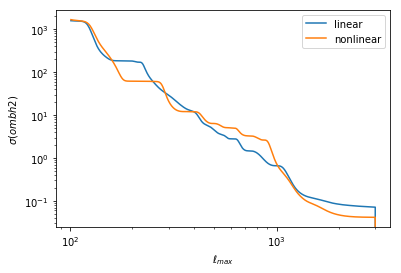

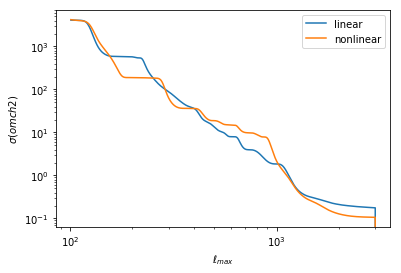

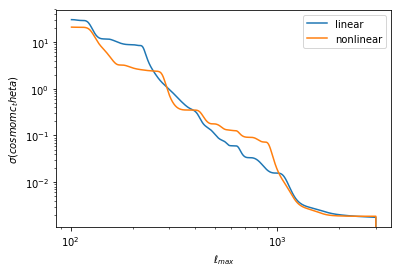

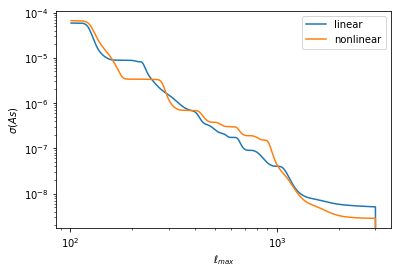

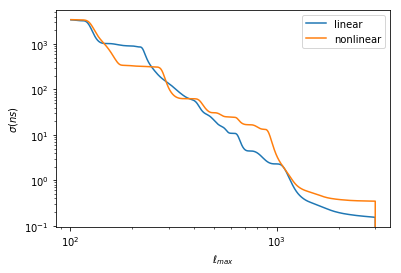

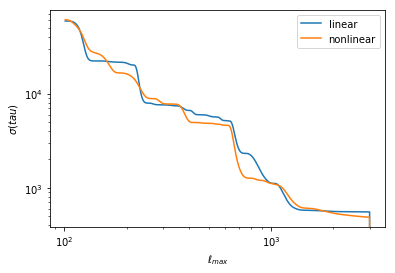

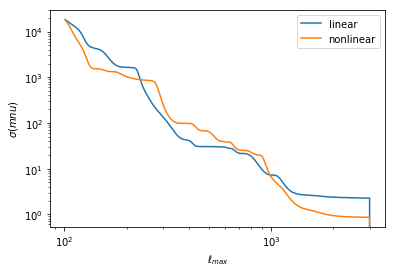

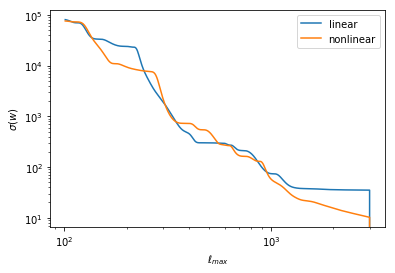

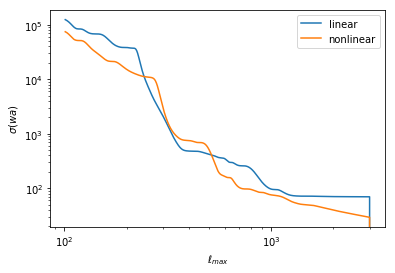

In [9]:
# plot linear and nonlinear together
myElls = ells[myLmin+ellOffset-1:]
for paramNum in range(nParams):
    #plt.plot(myElls,sigmas_l_kk2[paramNum],label='linear')
    #plt.plot(myElls,sigmas_l_kk4[paramNum],label='nonlinear')
    #plt.semilogx(myElls,sigmas_l_kk2[paramNum],label='linear')
    #plt.semilogx(myElls,sigmas_l_kk4[paramNum],label='nonlinear')
    plt.loglog(myElls,sigmas_l_kk2[paramNum],label='linear')
    plt.loglog(myElls,sigmas_l_kk4[paramNum],label='nonlinear')
    plt.xlabel(r'$\ell_{max}$')
    plt.ylabel(r'$\sigma({0})$'.format(paramList[paramNum]))
    plt.legend()
    plt.show()
    

In [10]:
# Do the same for TE - should show no dependence on P(k) nonlinearityf
covar_TE2 = Fobj2.covarP
covar_TE4 = Fobj4.covarP
dClVecs_TE2 = Fobj2.dClVecsP
dClVecs_TE4 = Fobj4.dClVecsP
print covar_TE2.shape,covar_TE4.shape
print dClVecs_TE2.shape,dClVecs_TE4.shape

(3, 3, 4999) (3, 3, 4999)
(3, 9, 4999) (3, 9, 4999)


In [11]:
# invert covariance matrices
invCov_TE2 = np.transpose(np.linalg.inv(np.transpose(covar_TE2)))
invCov_TE4 = np.transpose(np.linalg.inv(np.transpose(covar_TE4)))
print 'done.'

done.


In [12]:
lminP = Fobj2.lminP
lmaxP = Fobj2.lmaxP

minEllIndP = myLmin-lminP  # eg. 30-2
maxEllIndP = lmaxP-lminP 
nEllsP = maxEllIndP-minEllIndP

Fijl_TE2 = np.zeros((nParams,nParams,nEllsP))
Fijl_TE4 = np.zeros((nParams,nParams,nEllsP))

for pNum1 in range(nParams):
    for pNum2 in range(pNum1,nParams):
        # some index shenanigans to use np.dot
        dClVecs_TE2_1 = np.transpose(dClVecs_TE2[:,pNum1,minEllIndP:maxEllIndP])
        dClVecs_TE2_2 = np.transpose(dClVecs_TE2[:,pNum2,minEllIndP:maxEllIndP])
        invCov_TE2_select = invCov_TE2[:,:,minEllIndP:maxEllIndP]
        
        dClVecs_TE4_1 = np.transpose(dClVecs_TE4[:,pNum1,minEllIndP:maxEllIndP])
        dClVecs_TE4_2 = np.transpose(dClVecs_TE4[:,pNum2,minEllIndP:maxEllIndP])
        invCov_TE4_select = invCov_TE4[:,:,minEllIndP:maxEllIndP]
        
        #print dClVecs_TE2_1.shape,dClVecs_TE2_2.shape,invCov_TE2_select.shape
        for ell in range(nEllsP):
            Fijl_TE2[pNum1,pNum2,ell] = np.dot(np.dot(invCov_TE2_select[:,:,ell],
                                                      dClVecs_TE2_2[ell,:]),dClVecs_TE2_1[ell,:])
            Fijl_TE4[pNum1,pNum2,ell] = np.dot(np.dot(invCov_TE4_select[:,:,ell],
                                                      dClVecs_TE4_2[ell,:]),dClVecs_TE4_1[ell,:])
        
        Fijl_TE2[pNum2,pNum1] = Fijl_TE2[pNum1,pNum2]
        Fijl_TE4[pNum2,pNum1] = Fijl_TE4[pNum1,pNum2]

            
print 'done.'        

done.


In [13]:
# create arrays of running sums
ellOffset = 70 # more ell values to ditch at the beginning
Fijl_TE2_sums = np.zeros((nParams,nParams,nElls))
Fijl_TE4_sums = np.zeros((nParams,nParams,nElls))

Fijl_TE2_sums[:,:,0] = Fijl_TE2[:,:,0]
Fijl_TE4_sums[:,:,0] = Fijl_TE4[:,:,0]
for ell in range(1,nElls-1):
    Fijl_TE2_sums[:,:,ell] = Fijl_TE2_sums[:,:,ell-1]+Fijl_TE2[:,:,ell]
    Fijl_TE4_sums[:,:,ell] = Fijl_TE4_sums[:,:,ell-1]+Fijl_TE4[:,:,ell]
    
# invert...
print 'starting inversion...'
Fijkl_TE2_inv = np.transpose(np.linalg.inv(np.transpose(Fijl_TE2_sums[:,:,ellOffset:-1])))
Fijkl_TE4_inv = np.transpose(np.linalg.inv(np.transpose(Fijl_TE4_sums[:,:,ellOffset:-1])))

print 'getting sigmas...'
sigmas_l_TE2 = np.zeros((nParams,nElls-ellOffset))
sigmas_l_TE4 = np.zeros((nParams,nElls-ellOffset))
for ell in range(nElls-ellOffset-1):
    sigmas_l_TE2[:,ell] = np.sqrt(np.diag(Fijkl_TE2_inv[:,:,ell]))
    sigmas_l_TE4[:,ell] = np.sqrt(np.diag(Fijkl_TE4_inv[:,:,ell]))

print 'done.'
    

starting inversion...
getting sigmas...
done.


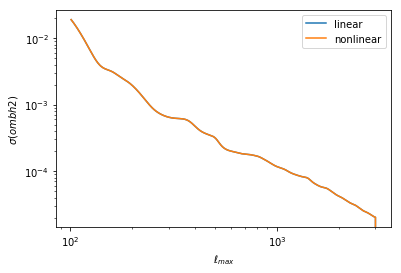

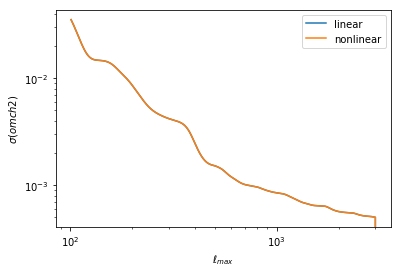

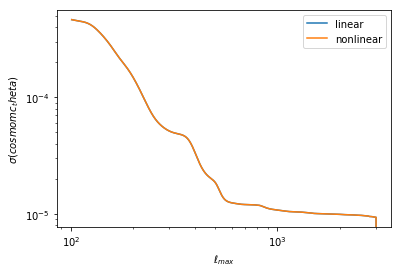

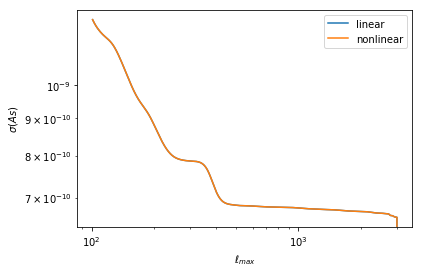

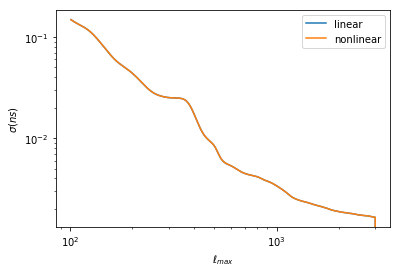

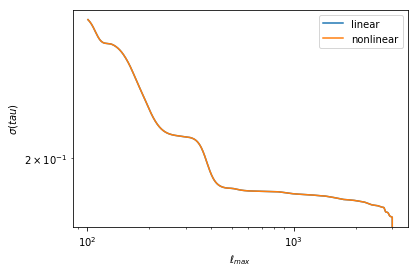

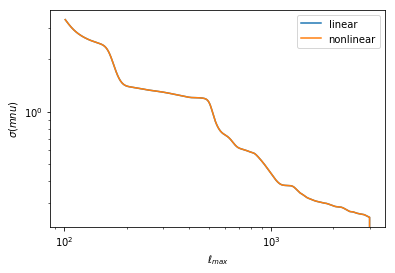

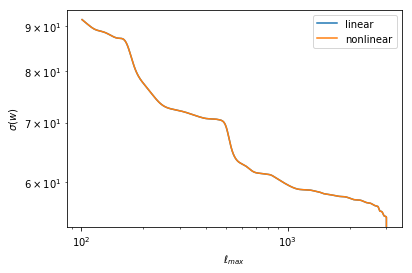

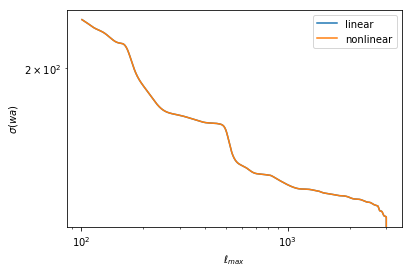

In [14]:
# plot linear and nonlinear together
myElls = ells[myLmin+ellOffset-1:]
for paramNum in range(nParams):
    #plt.plot(myElls,sigmas_l_TE2[paramNum],label='linear')
    #plt.plot(myElls,sigmas_l_TE4[paramNum],label='nonlinear')
    #plt.semilogx(myElls,sigmas_l_TE2[paramNum],label='linear')
    #plt.semilogx(myElls,sigmas_l_TE4[paramNum],label='nonlinear')
    plt.loglog(myElls,sigmas_l_TE2[paramNum],label='linear')
    plt.loglog(myElls,sigmas_l_TE4[paramNum],label='nonlinear')
    plt.xlabel(r'$\ell_{max}$')
    plt.ylabel(r'$\sigma({0})$'.format(paramList[paramNum]))
    plt.legend()
    plt.show()
    

In [15]:
# not affected by nonlinearity of P(k), as expected.

In [16]:
print nParams,nCosParams,nParams+nBins

9 9 25


In [17]:
print Fobj2.dClVecs.shape

(153, 25, 2999)


In [18]:
nToPlot = 17 # kk and kg at beginning of array

In [19]:
print paramList
print paramList[7]
print paramList[8]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
w
wa


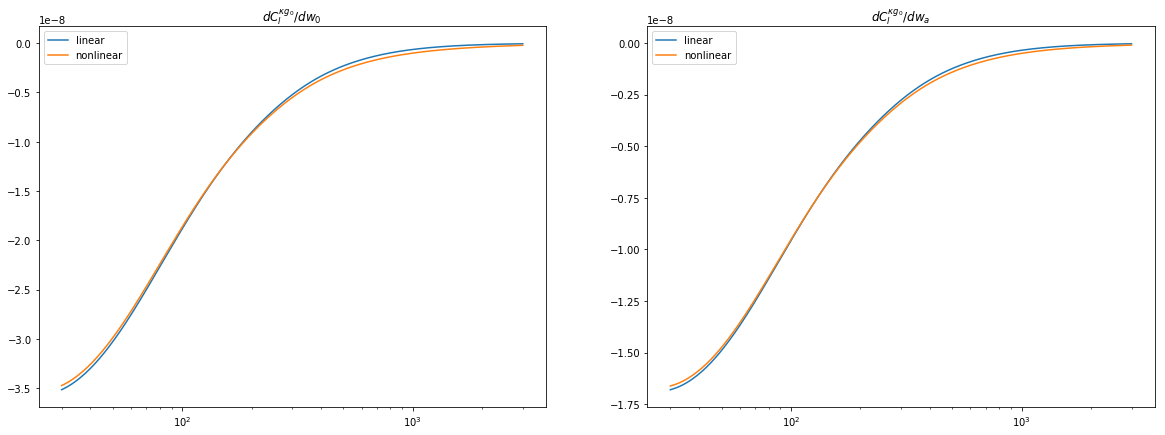

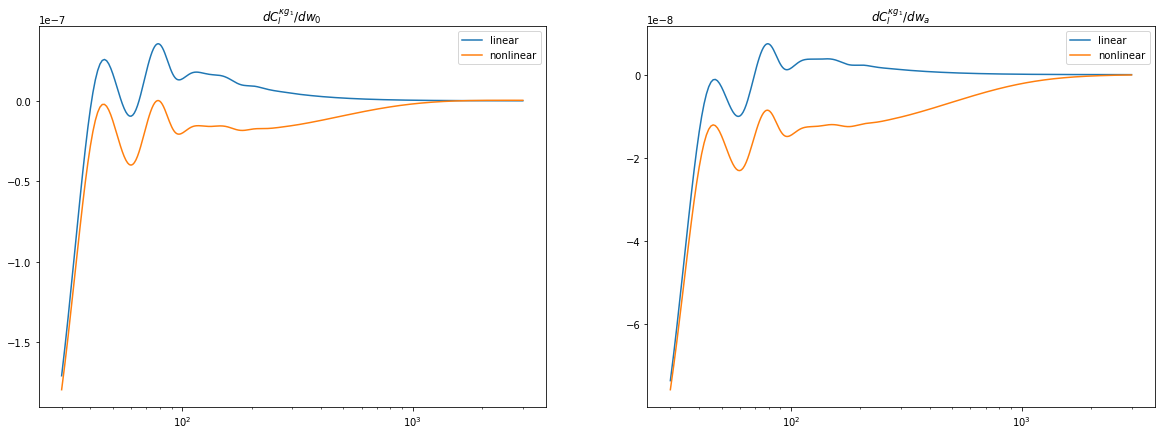

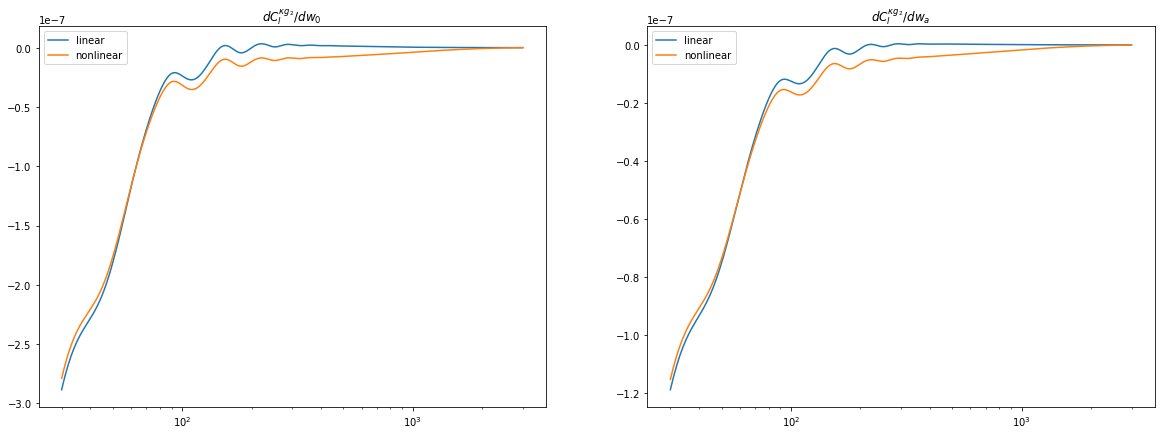

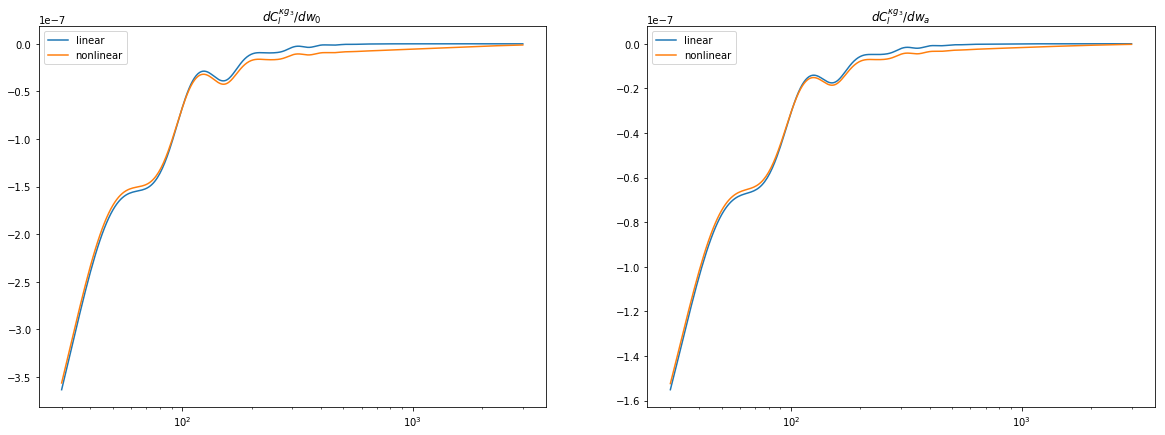

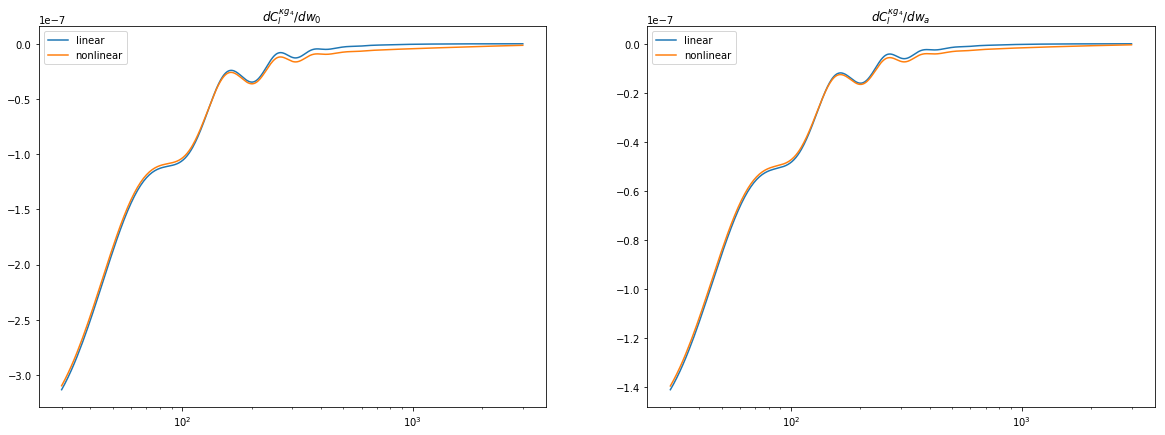

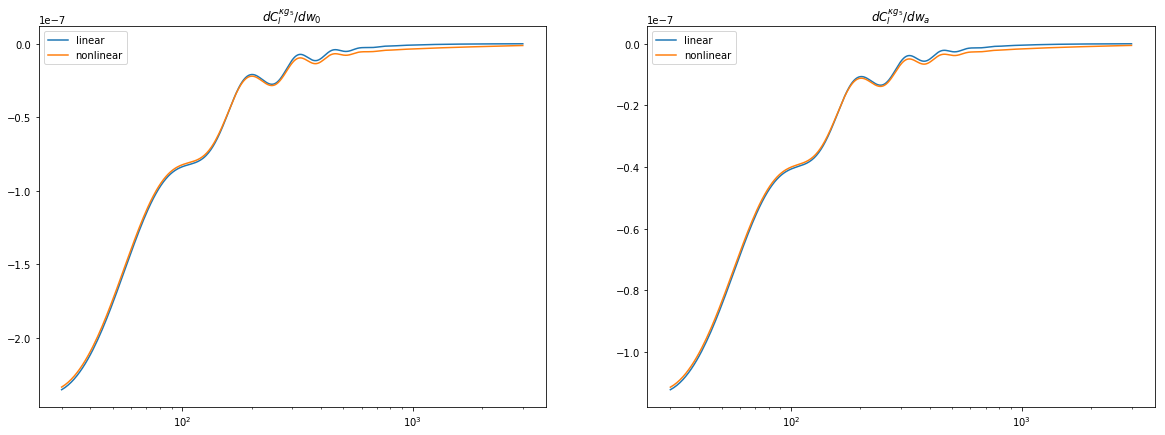

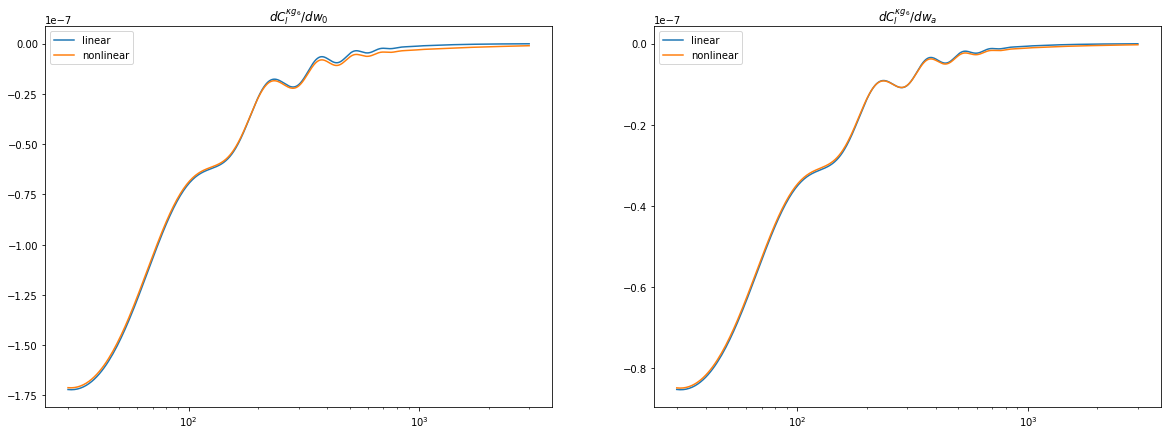

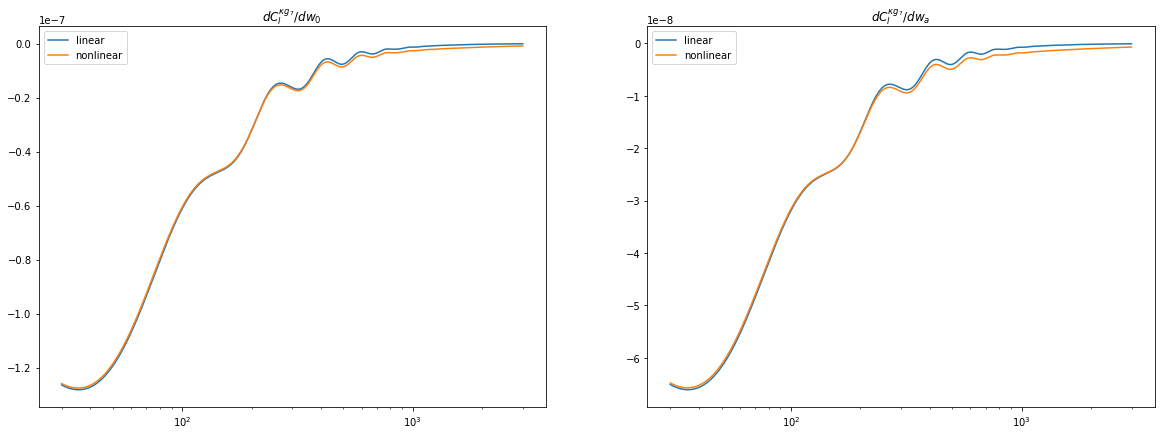

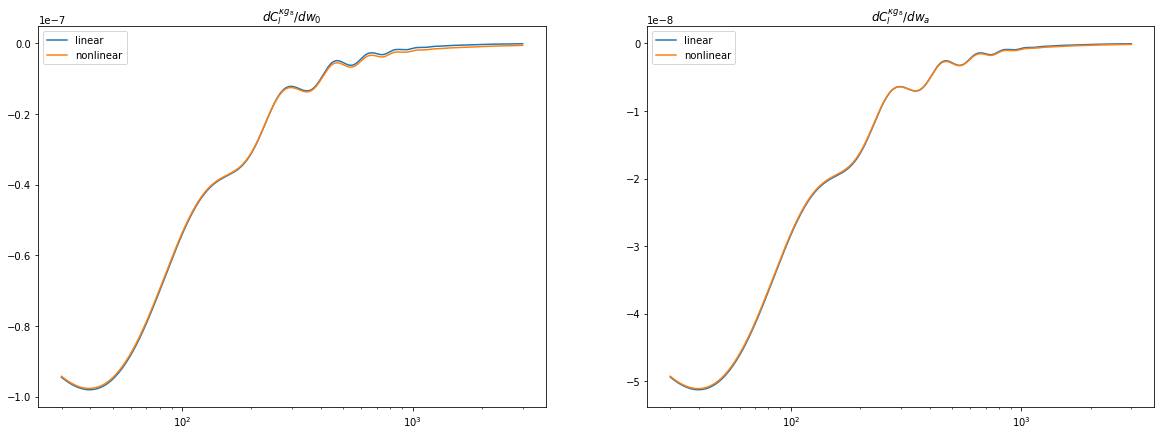

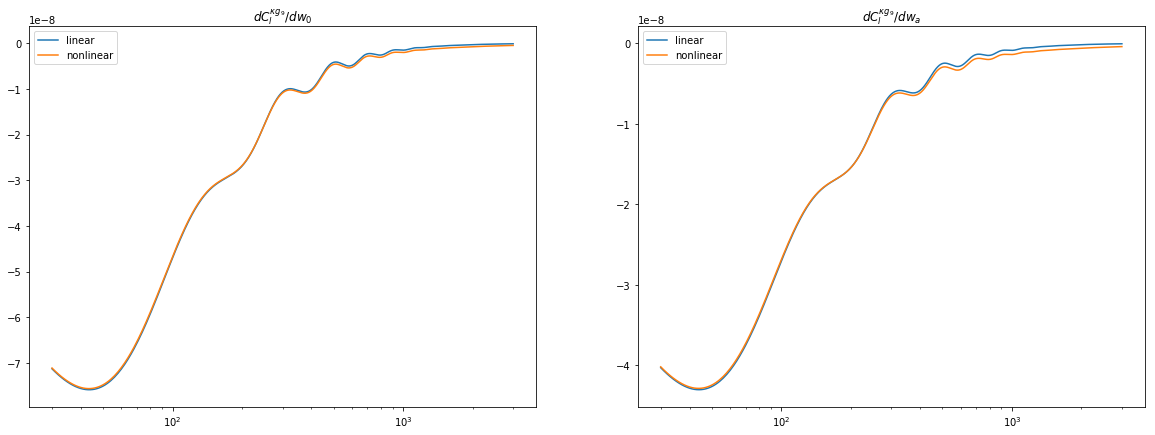

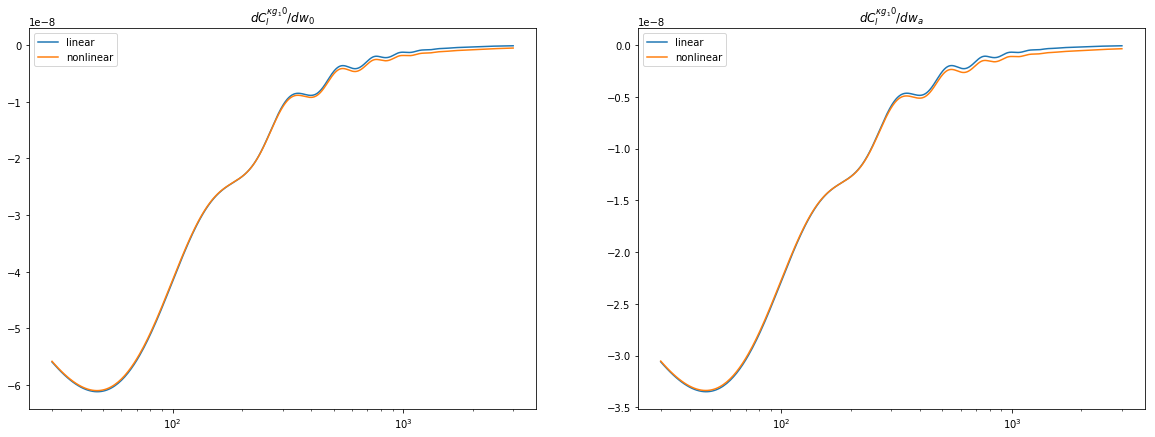

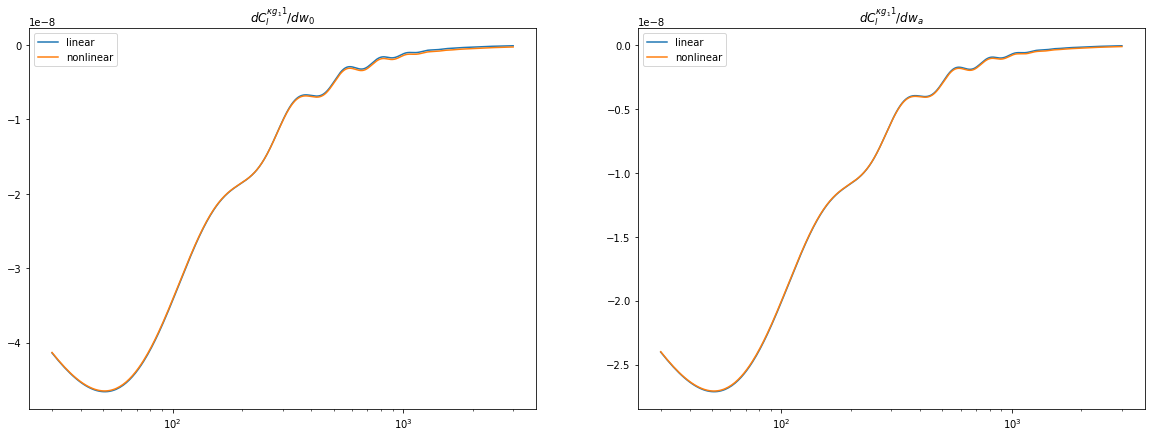

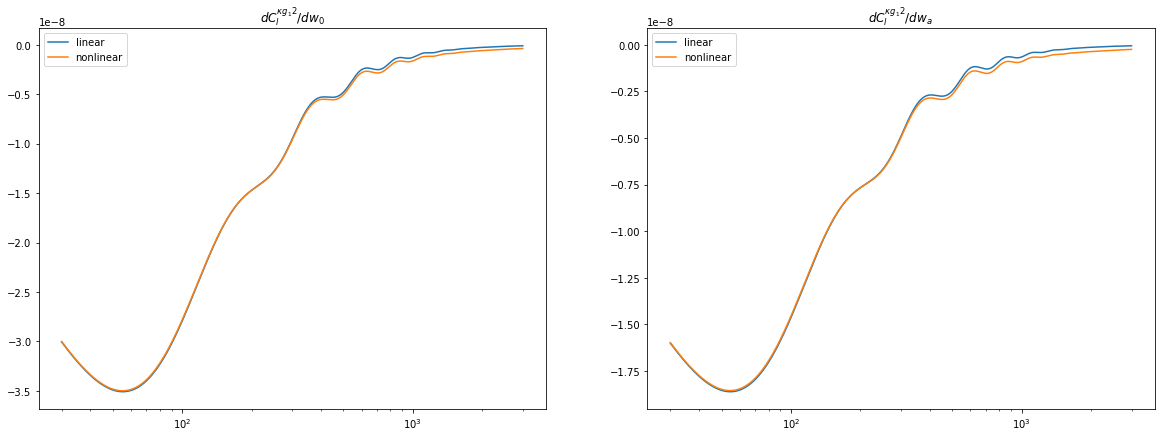

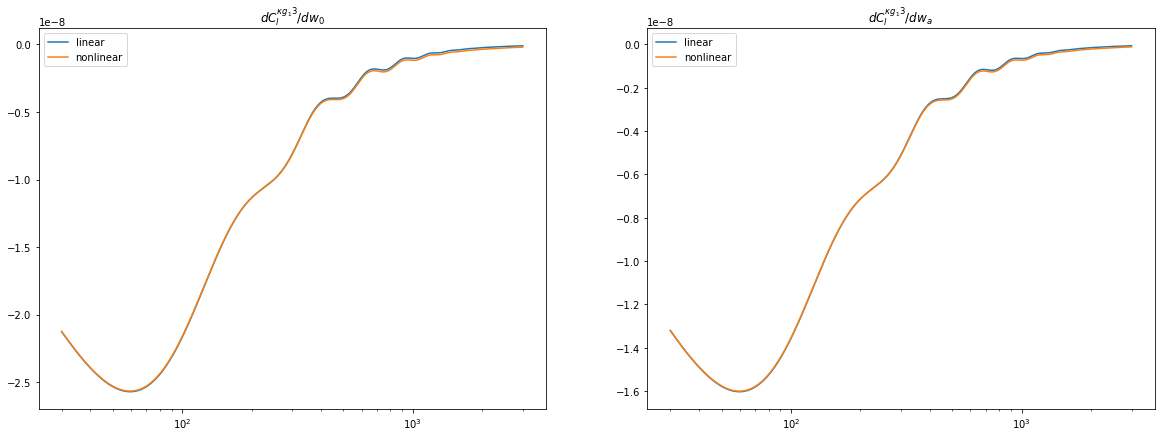

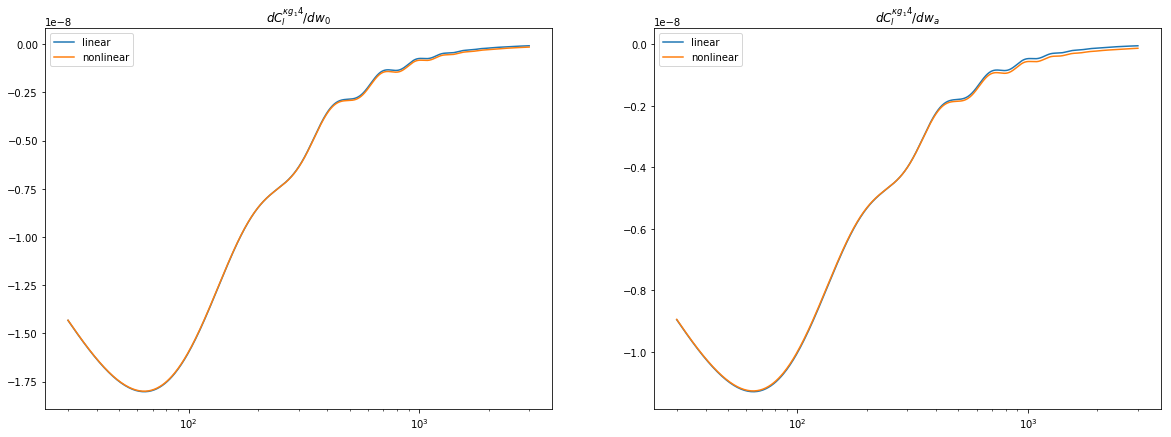

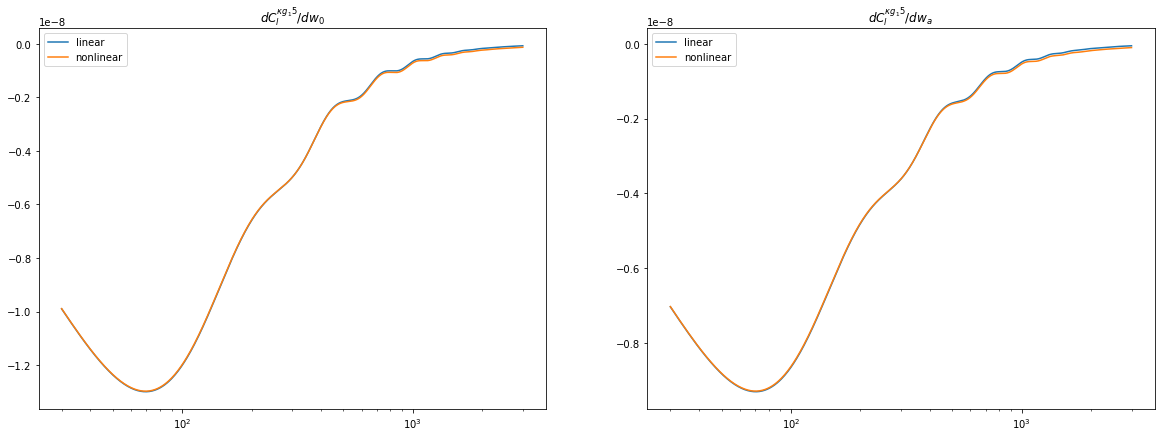

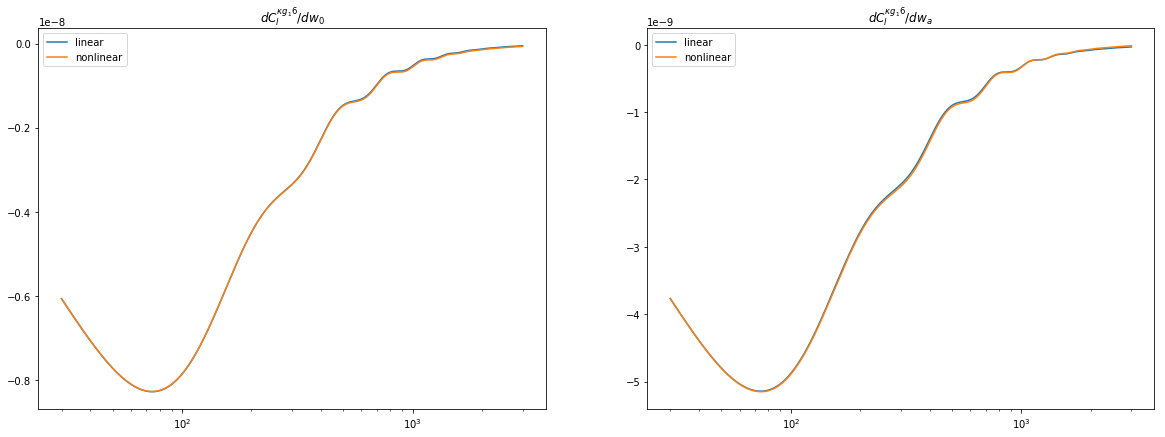

In [25]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    label1='linear'
    label2='nonlinear'
    #label1='Casarini'
    #label2='Tahakashi'
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells[28:],Fobj2.dClVecs[specNum,w0Num,28:],label=label1)
    plt.semilogx(ells[28:],Fobj4.dClVecs[specNum,w0Num,28:],label=label2)
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells[28:],Fobj2.dClVecs[specNum,waNum,28:],label=label1)
    plt.semilogx(ells[28:],Fobj4.dClVecs[specNum,waNum,28:],label=label2)
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    
    

In [26]:
print Fobj2.crossCls.shape

(17, 17, 2999)


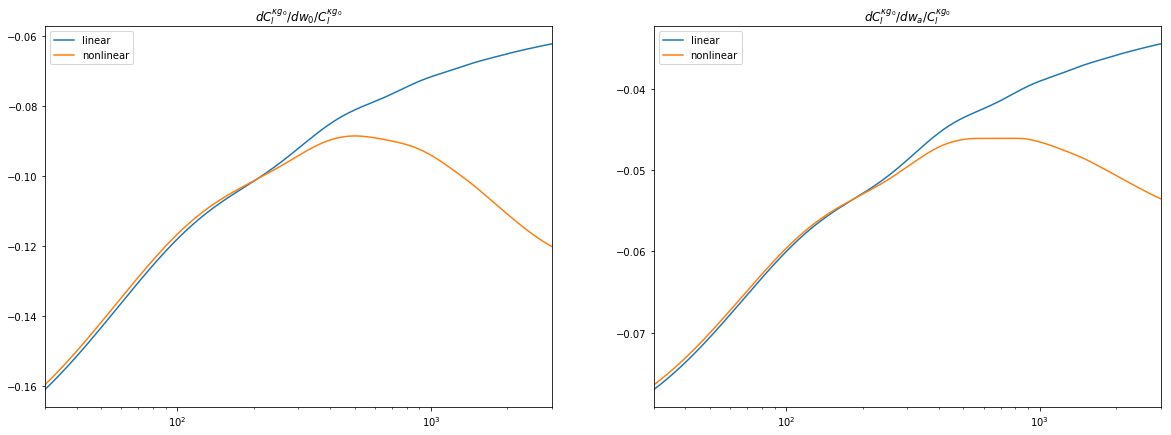

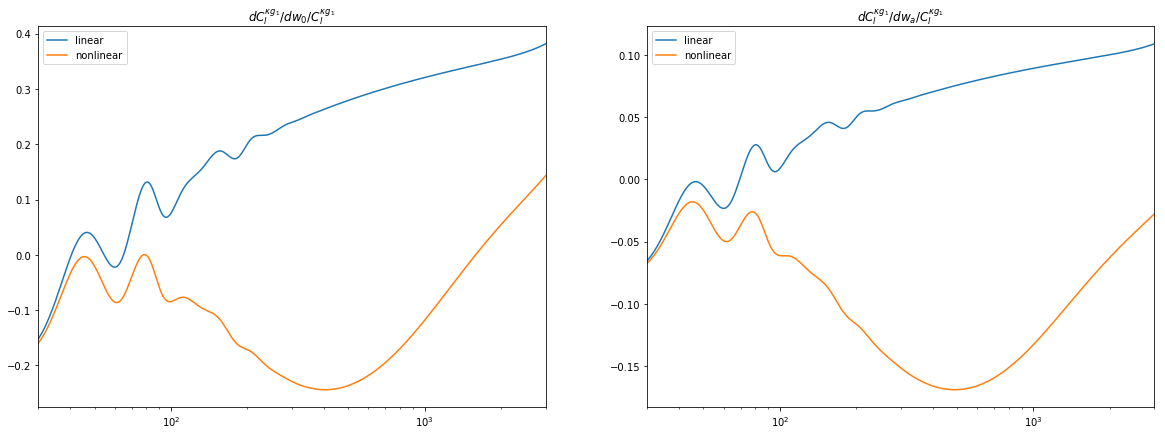

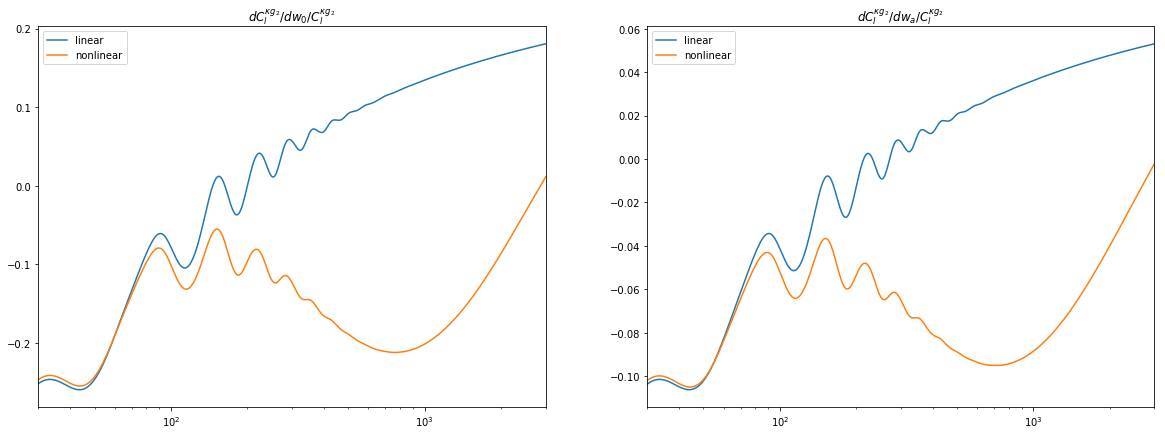

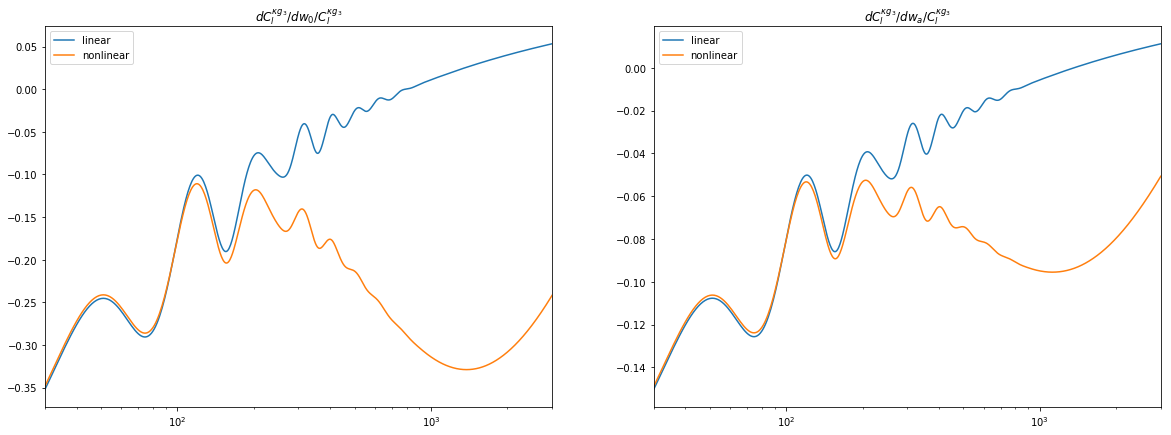

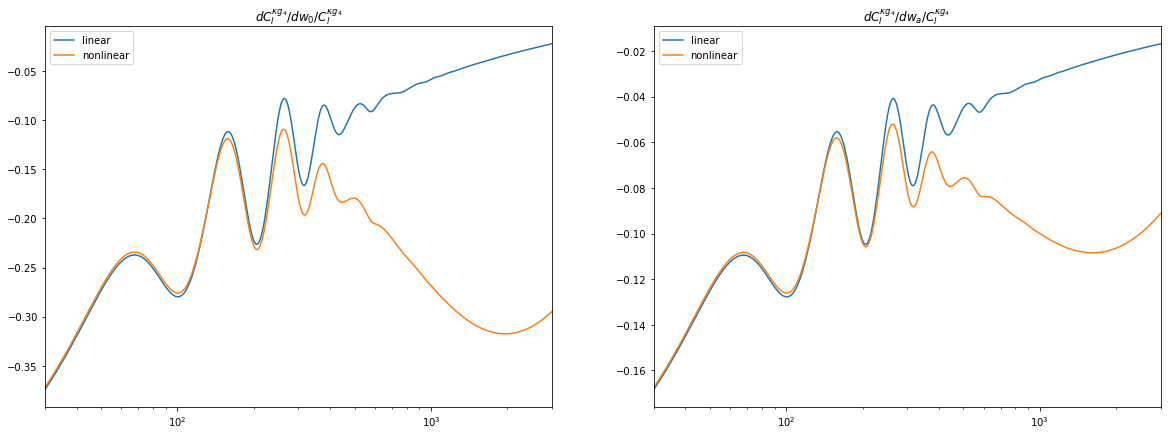

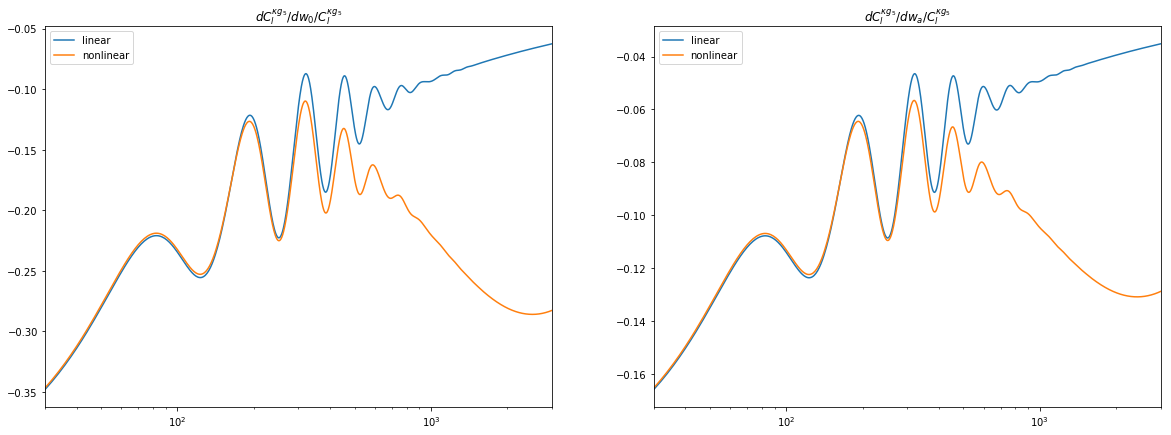

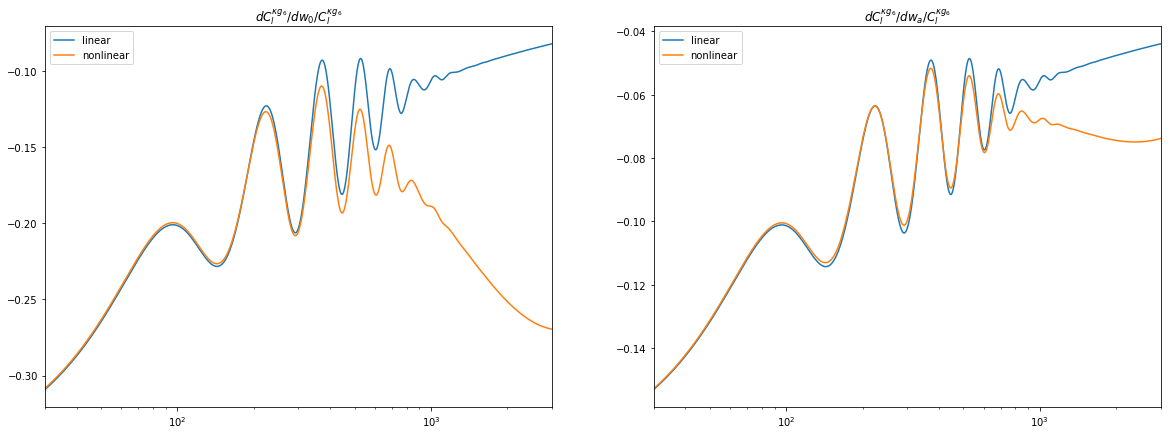

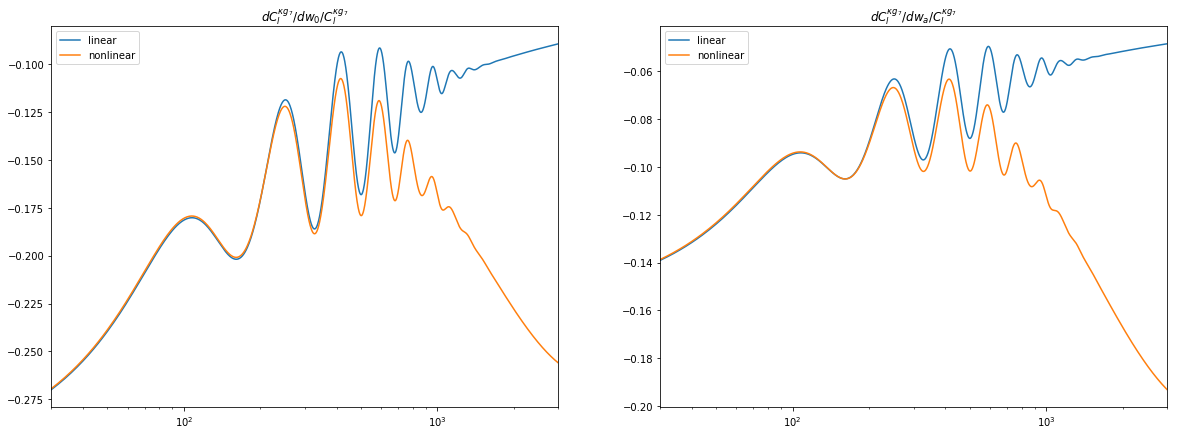

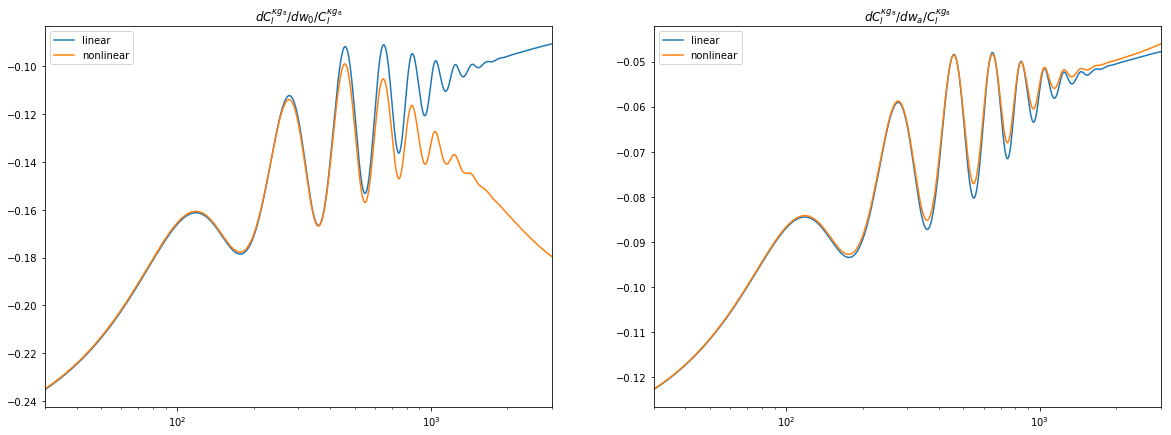

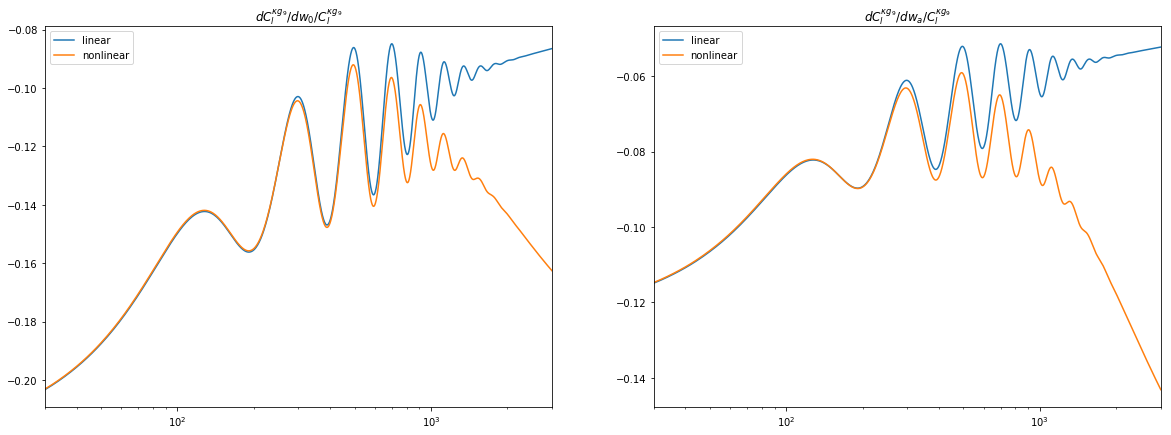

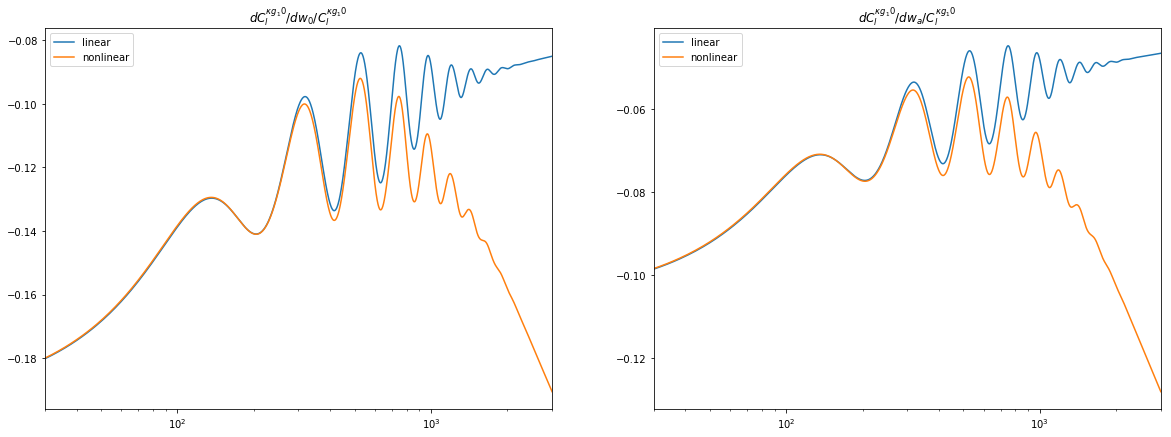

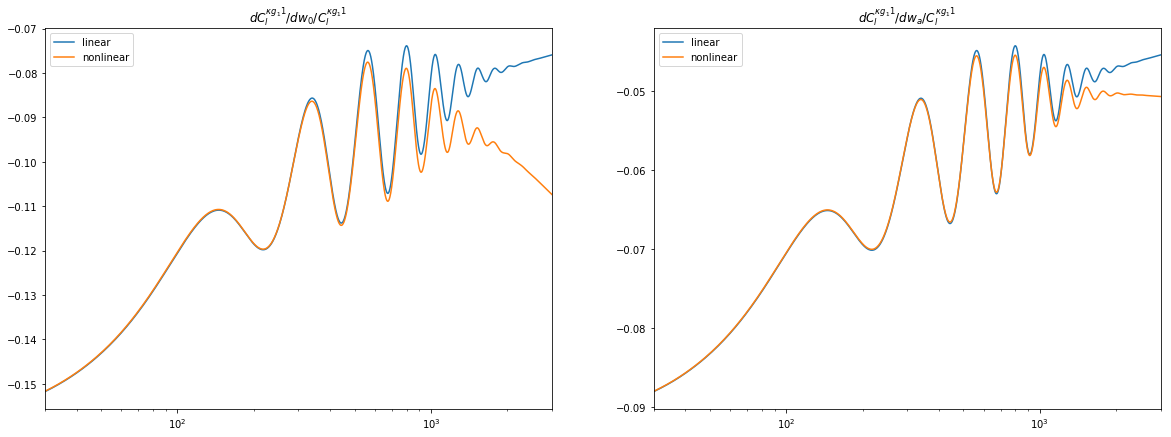

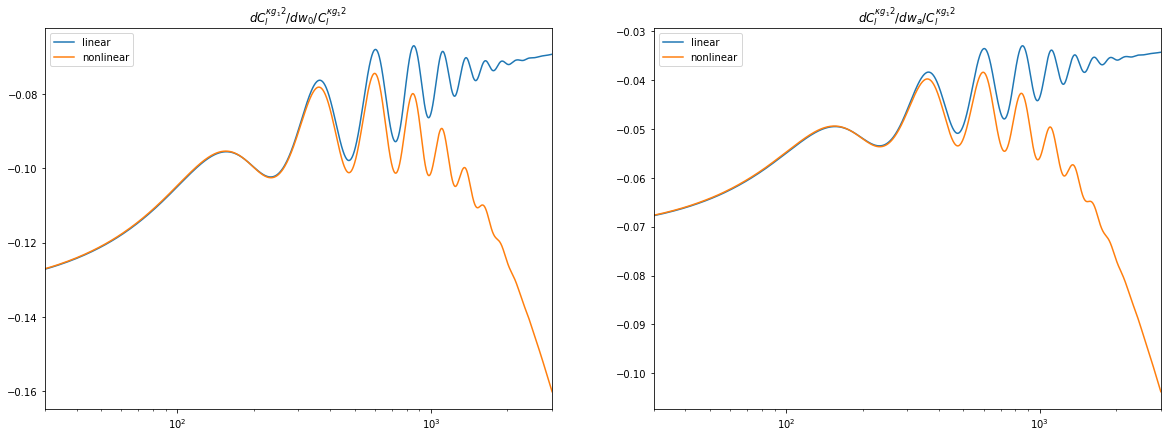

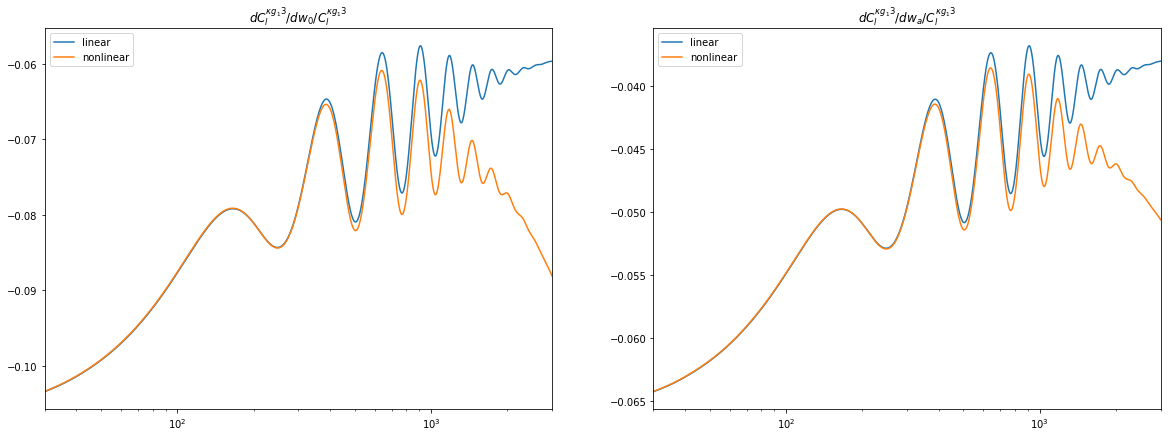

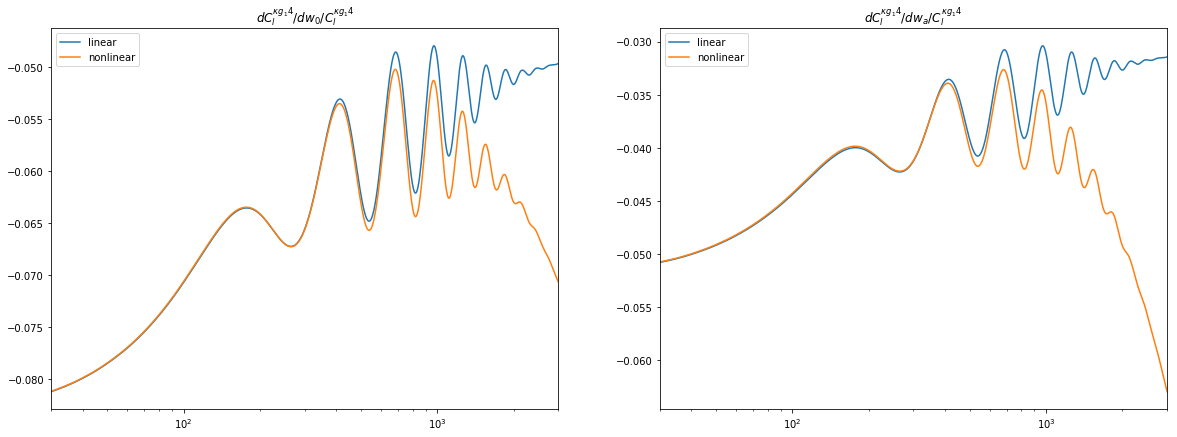

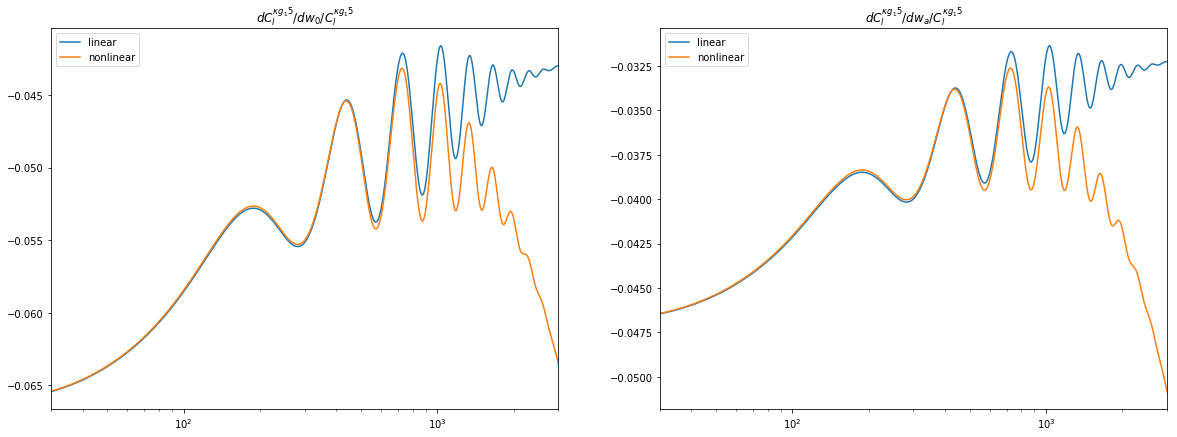

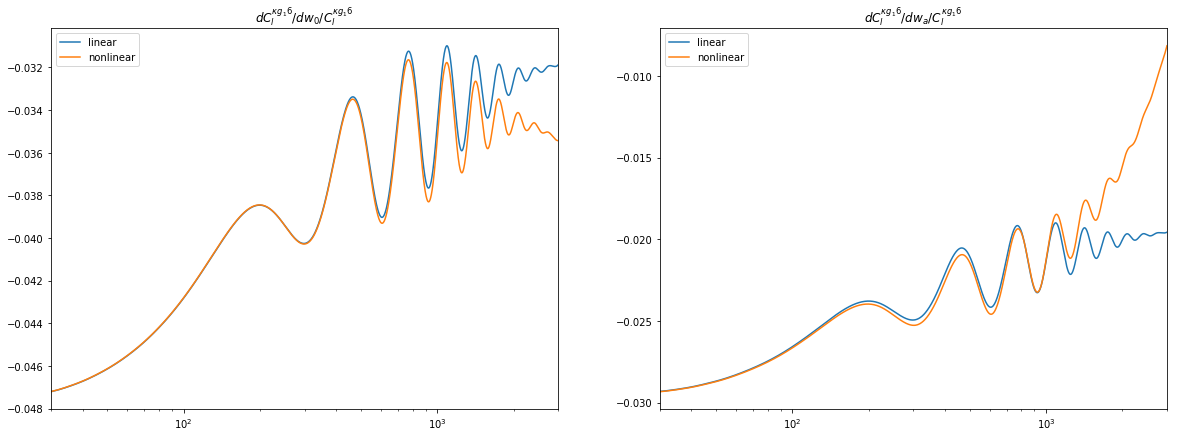

In [27]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells[28:],Fobj2.dClVecs[specNum,w0Num,28:]/Fobj2.crossCls[0,specNum,28:],label=label1)
    plt.semilogx(ells[28:],Fobj4.dClVecs[specNum,w0Num,28:]/Fobj4.crossCls[0,specNum,28:],label=label2)
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells[28:],Fobj2.dClVecs[specNum,waNum,28:]/Fobj2.crossCls[0,specNum,28:],label=label1)
    plt.semilogx(ells[28:],Fobj4.dClVecs[specNum,waNum,28:]/Fobj4.crossCls[0,specNum,28:],label=label2)
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

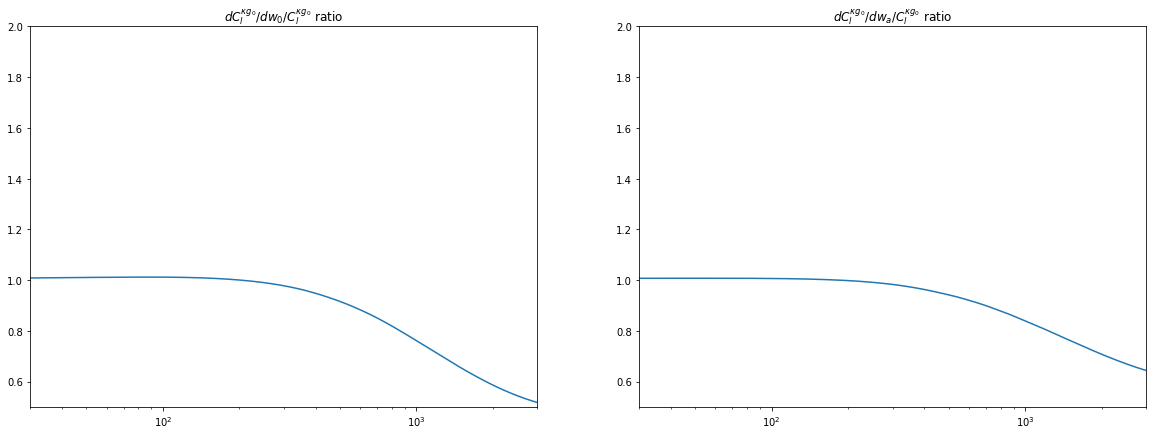

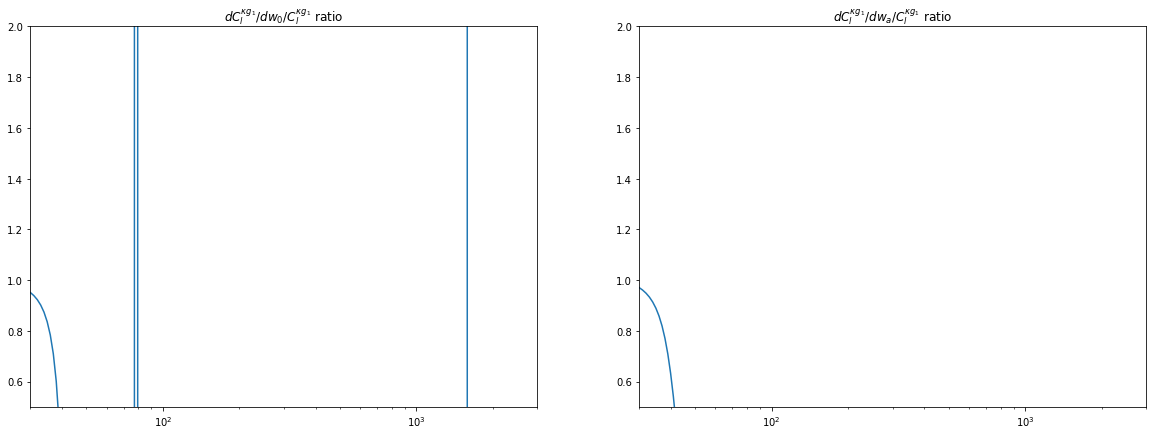

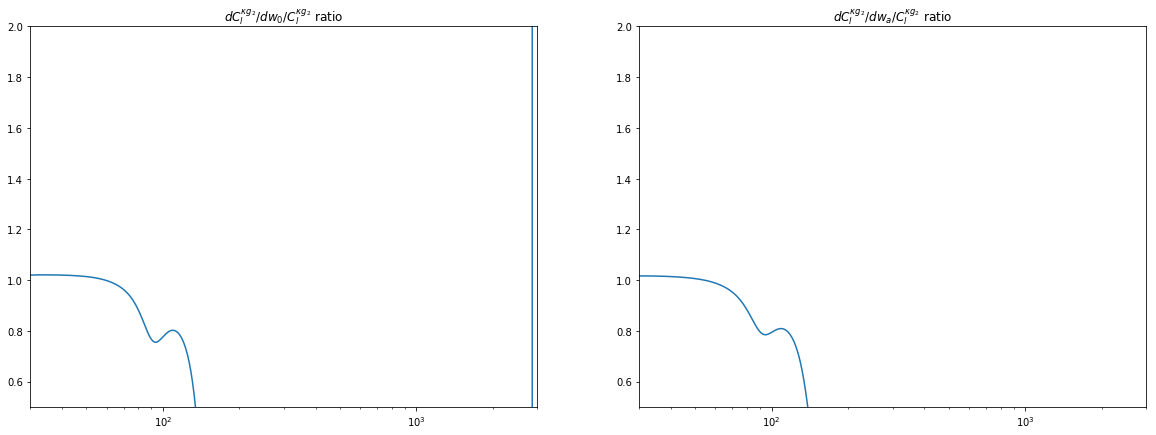

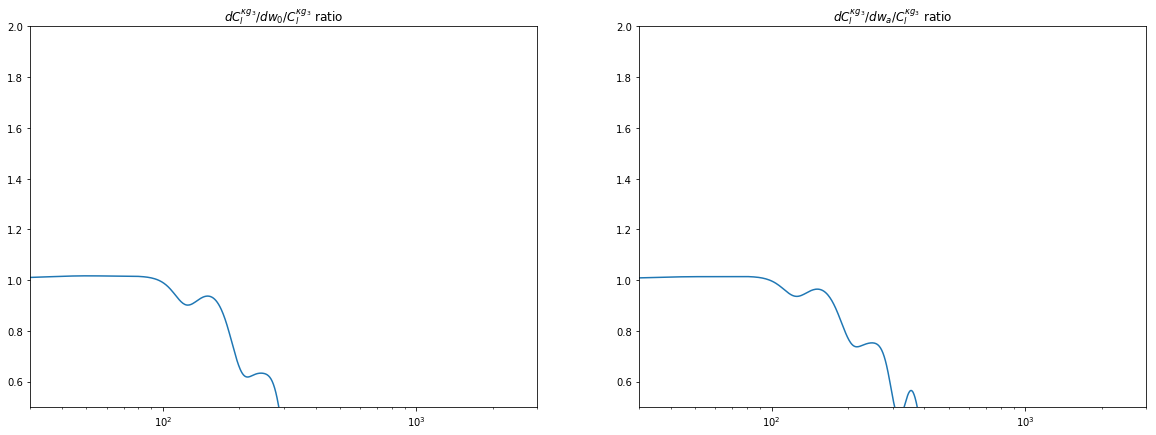

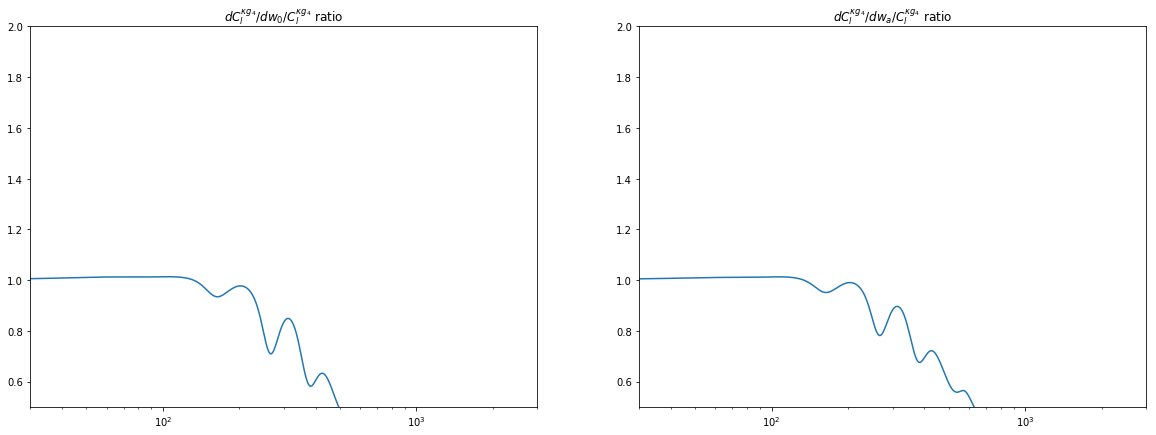

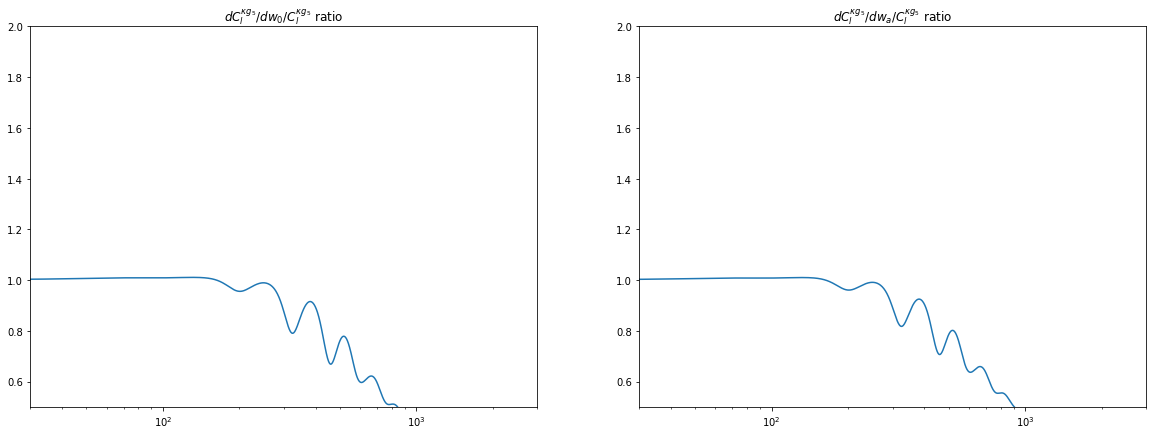

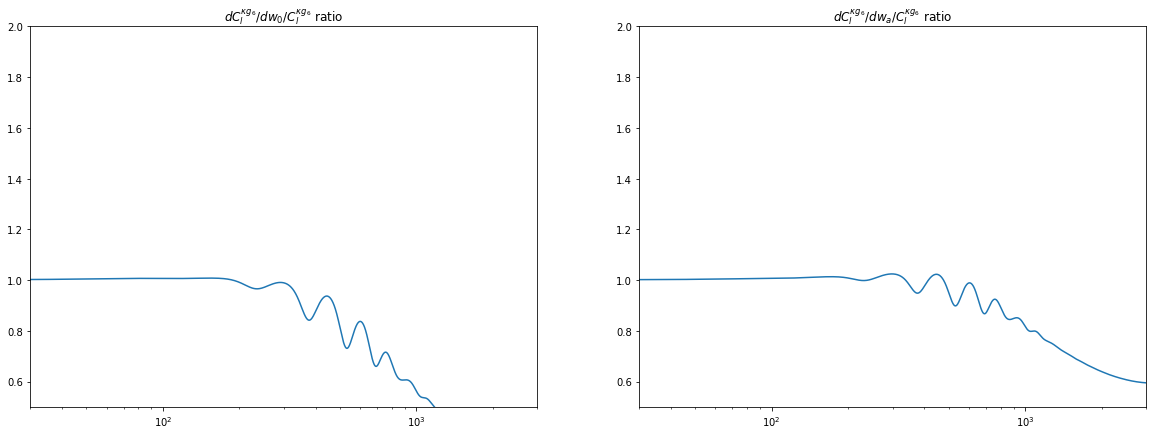

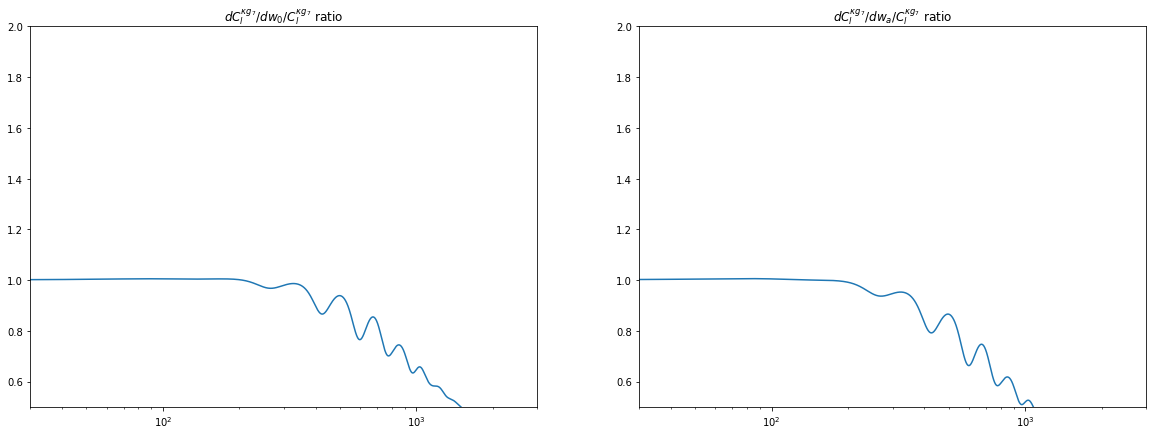

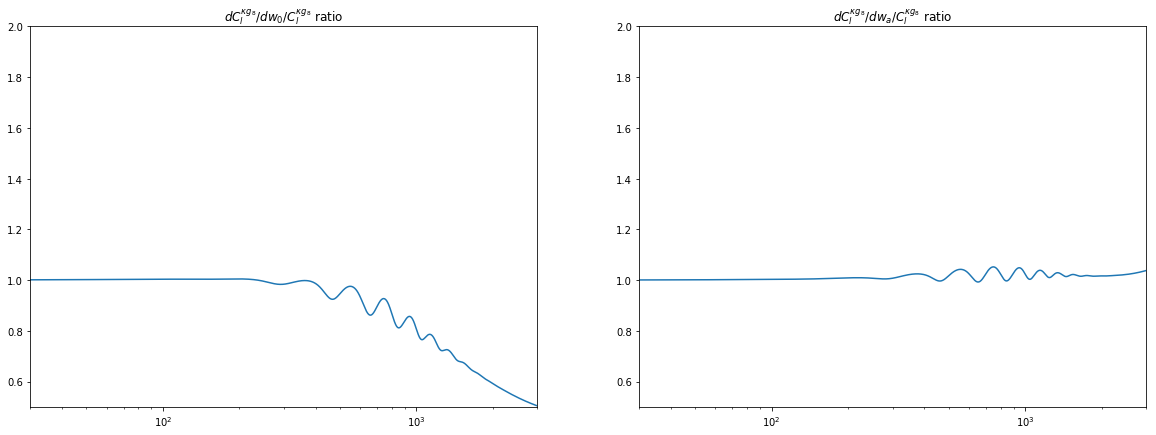

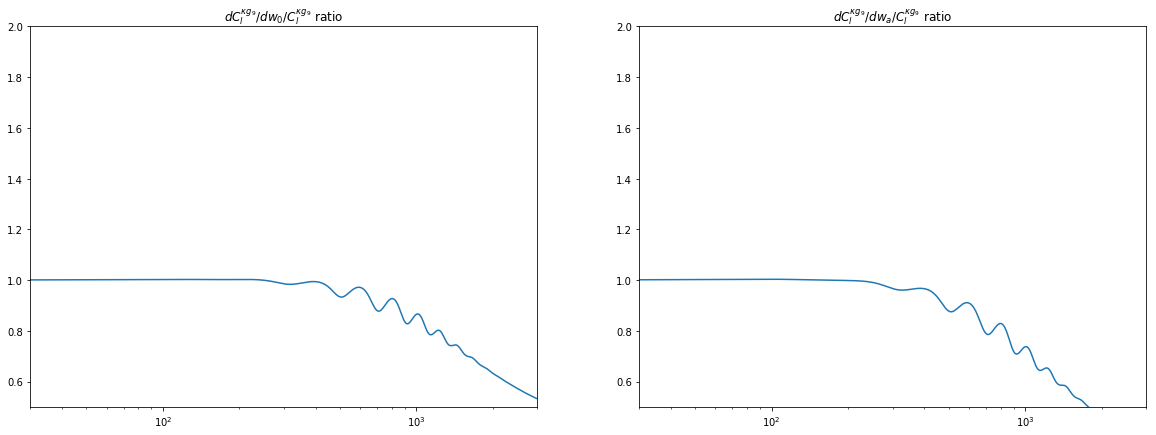

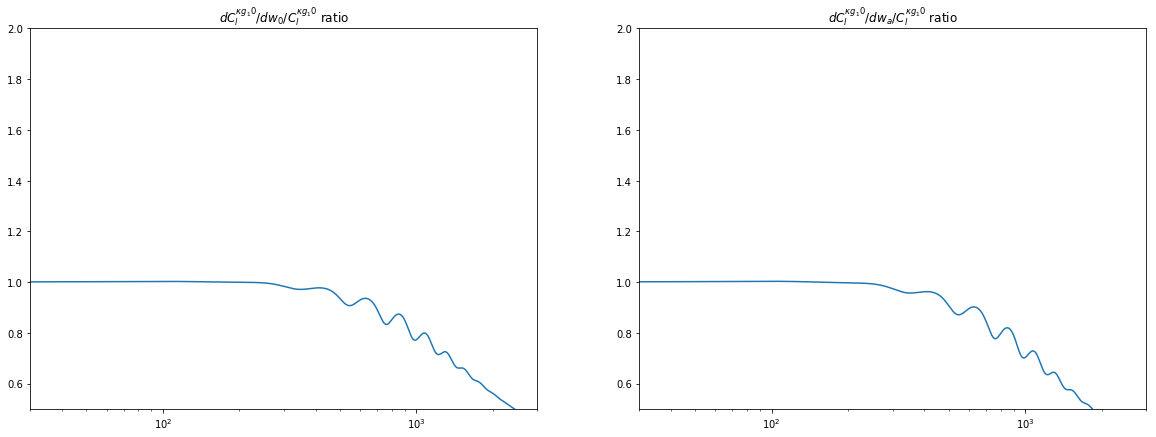

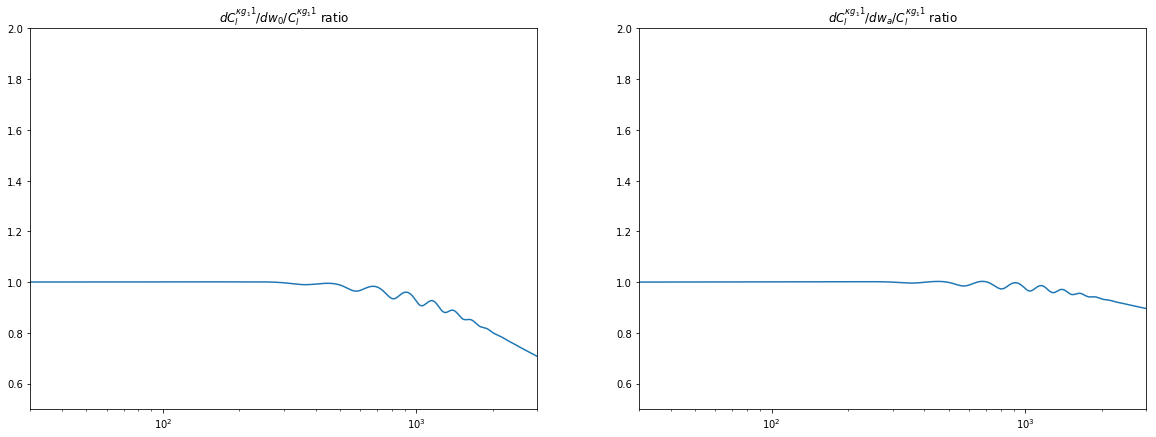

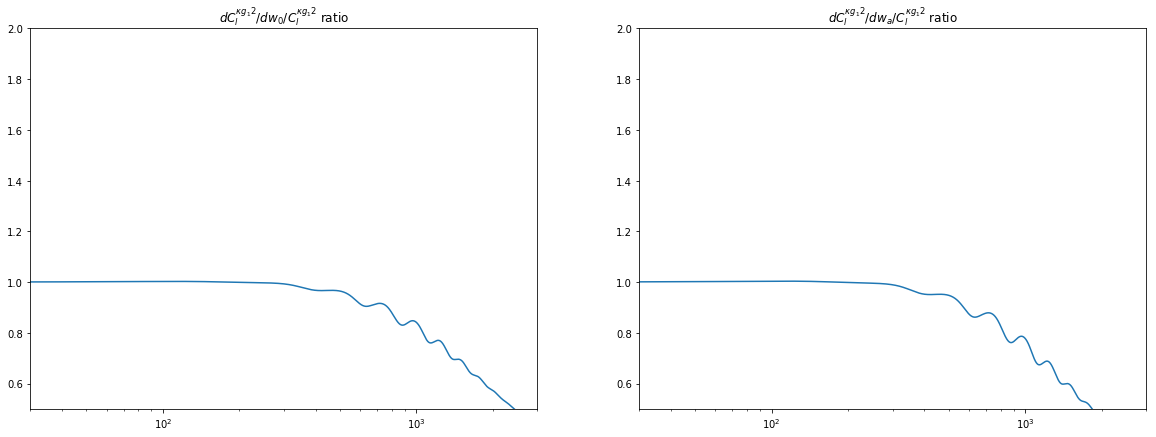

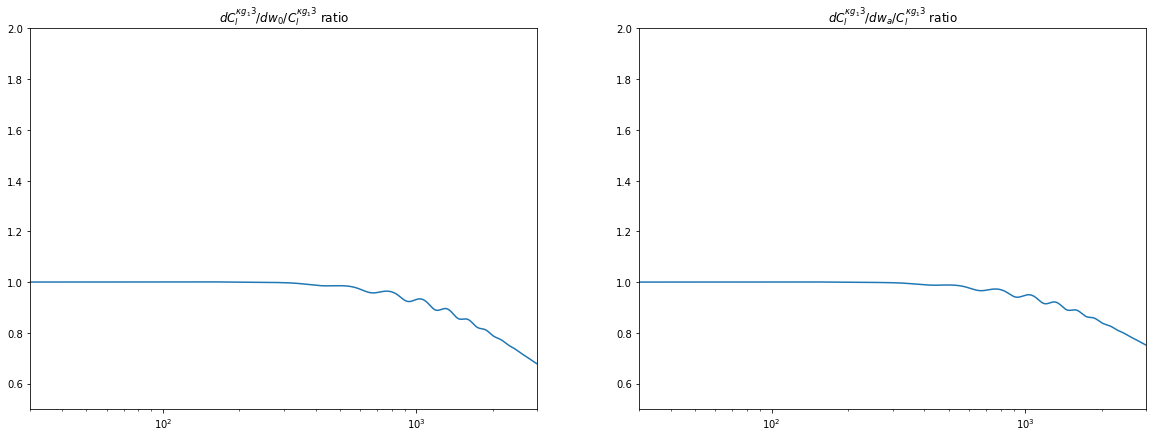

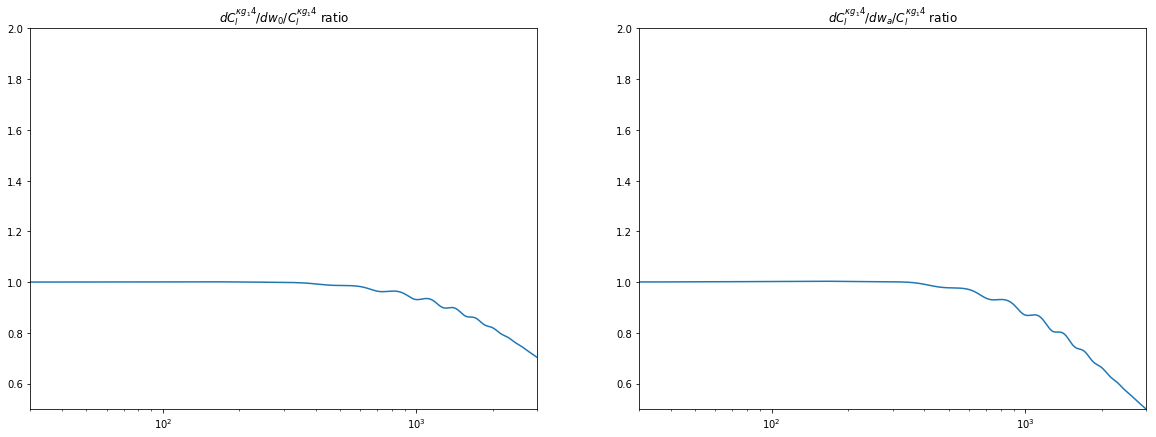

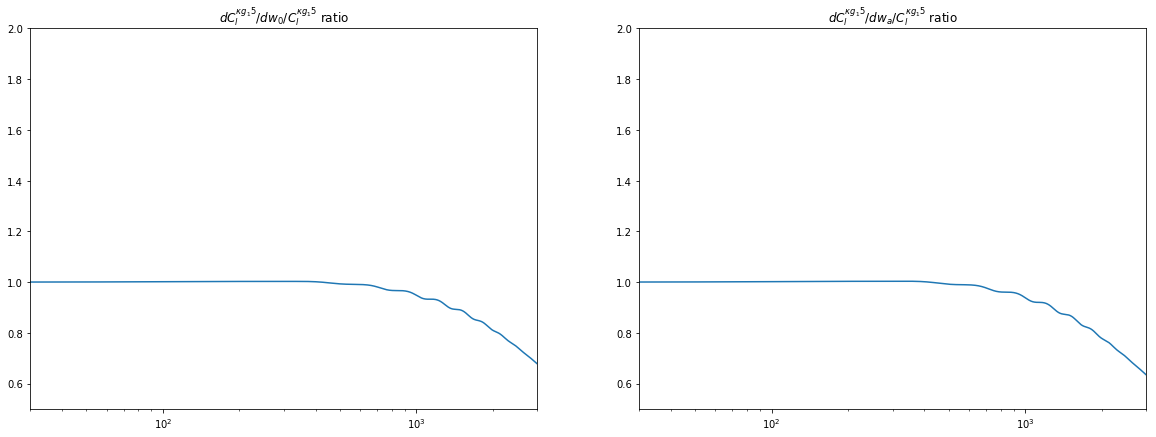

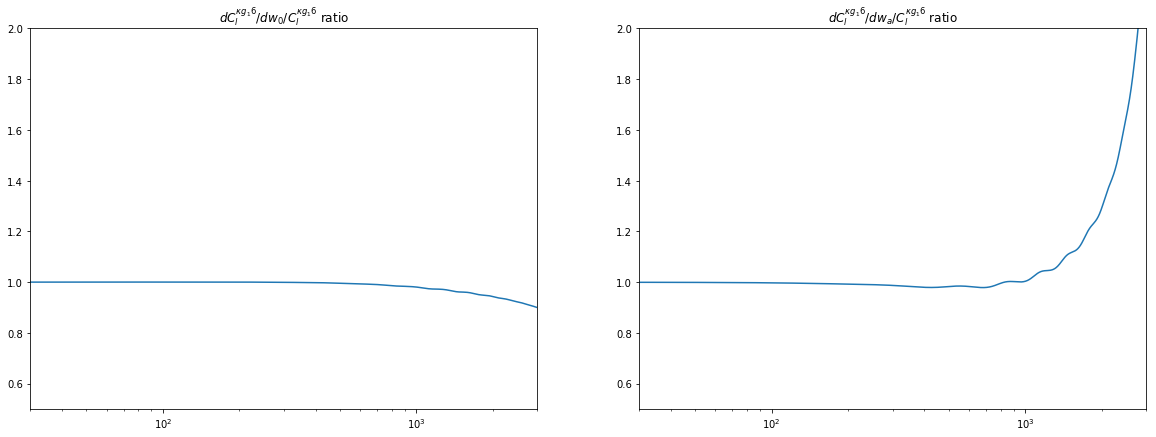

In [28]:
# now plot as ratio
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,(Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum]) /
                      (Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum]) )
    #plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$ ratio'.format(specNum))
    plt.xlim([30,3000])
    plt.ylim([0.5,2])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,(Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum]) /
                      (Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum]) )
    #plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$ ratio'.format(specNum))
    plt.xlim([30,3000])
    plt.ylim([0.5,2])
    plt.show()
    

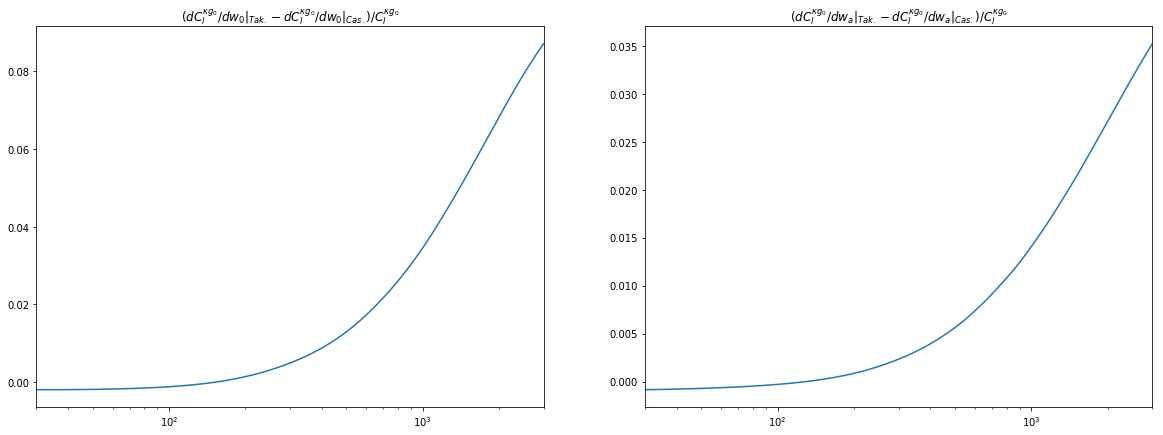

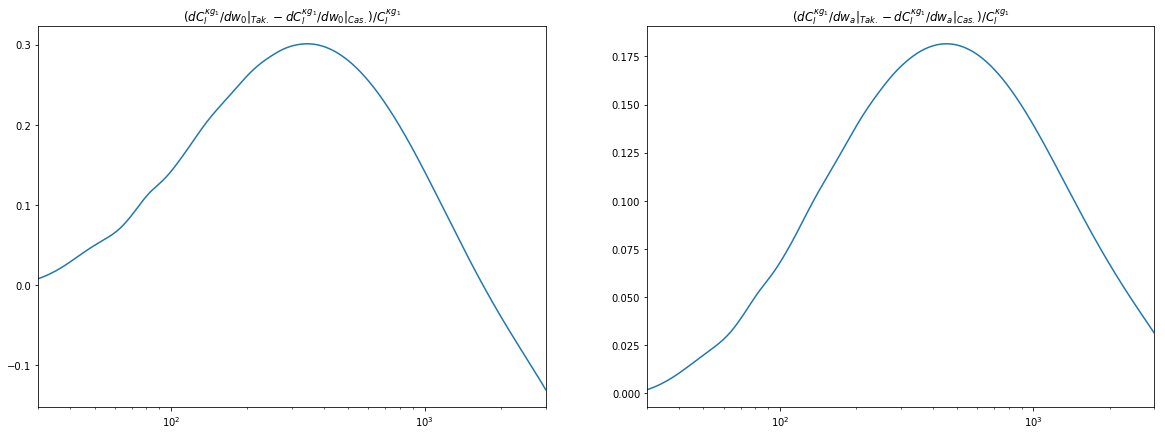

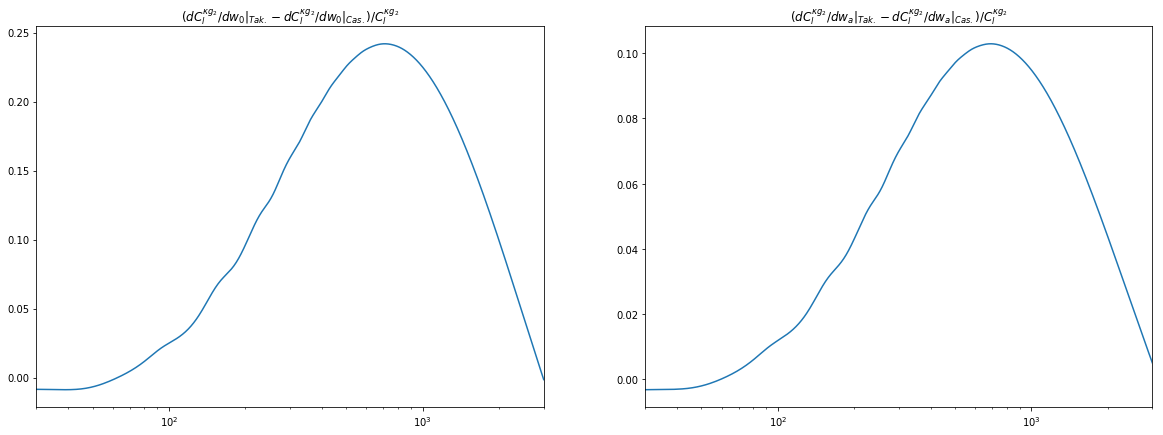

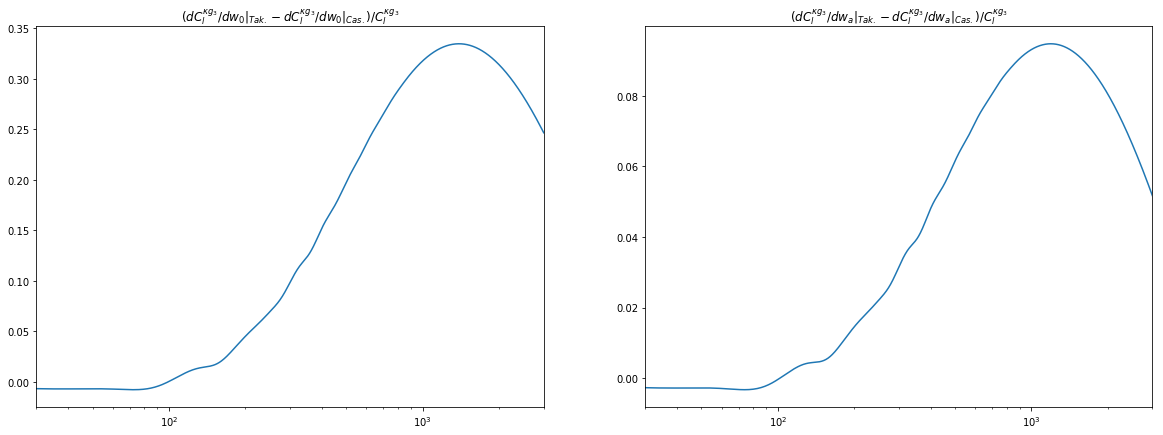

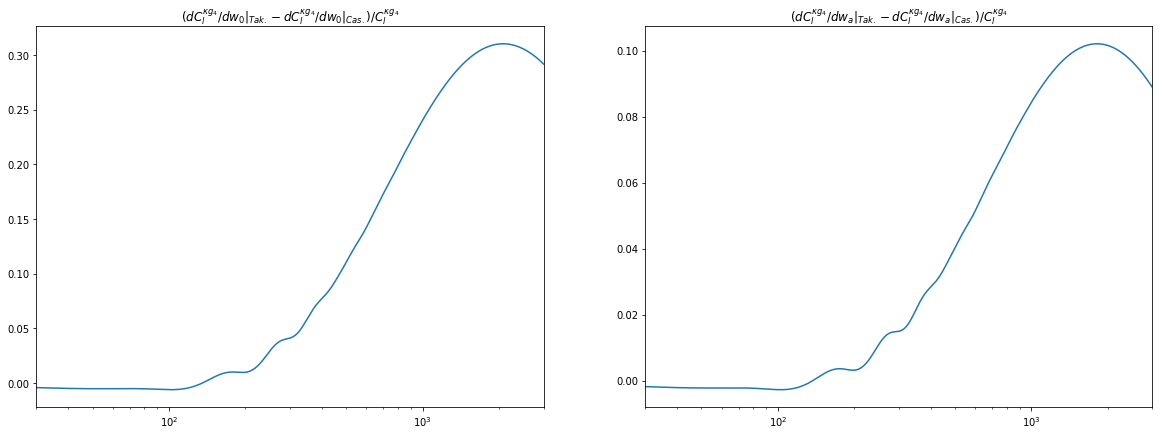

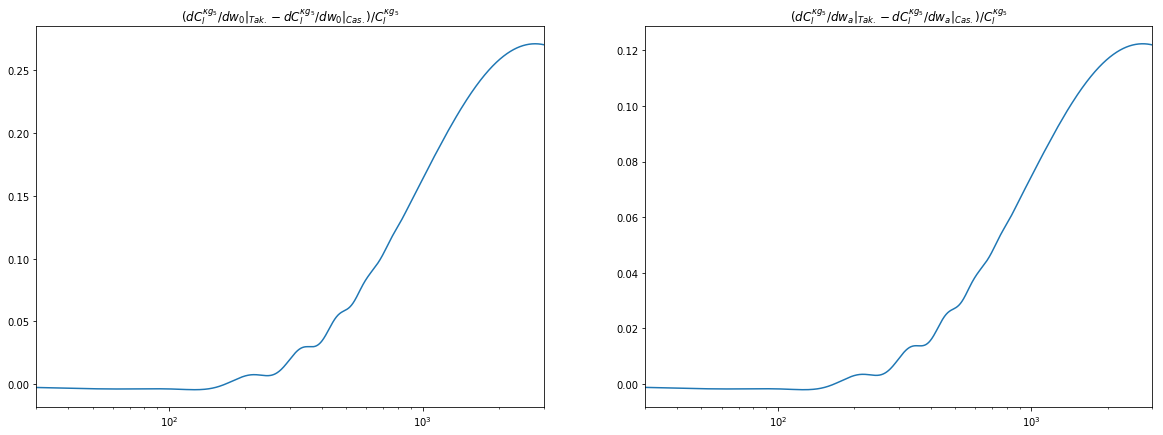

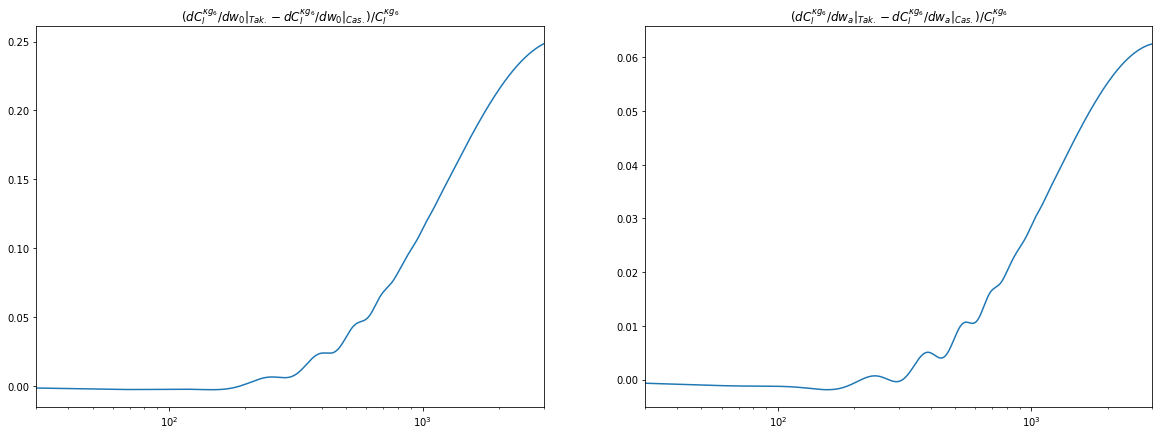

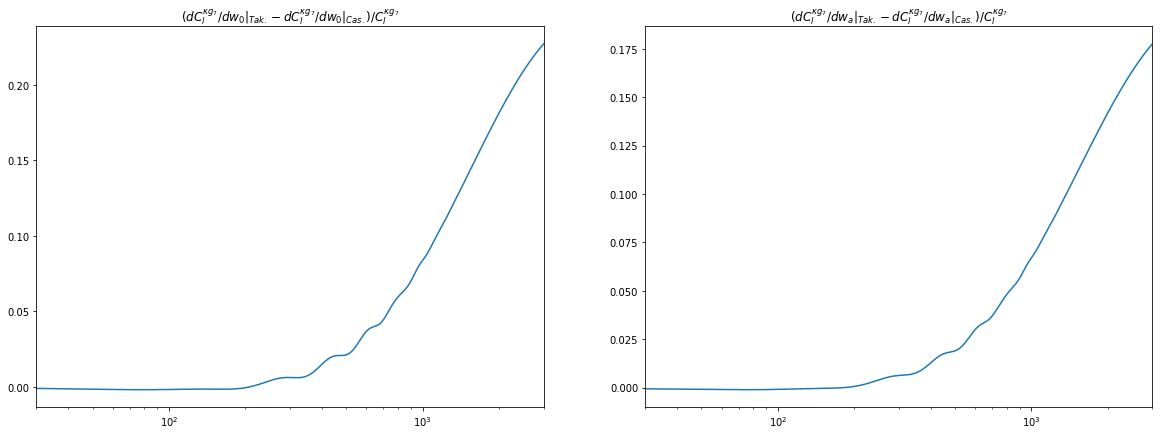

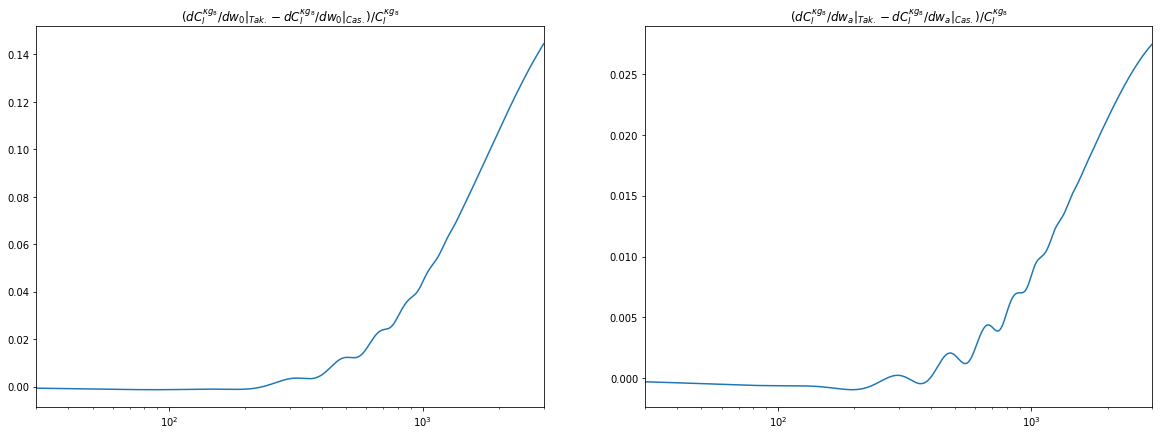

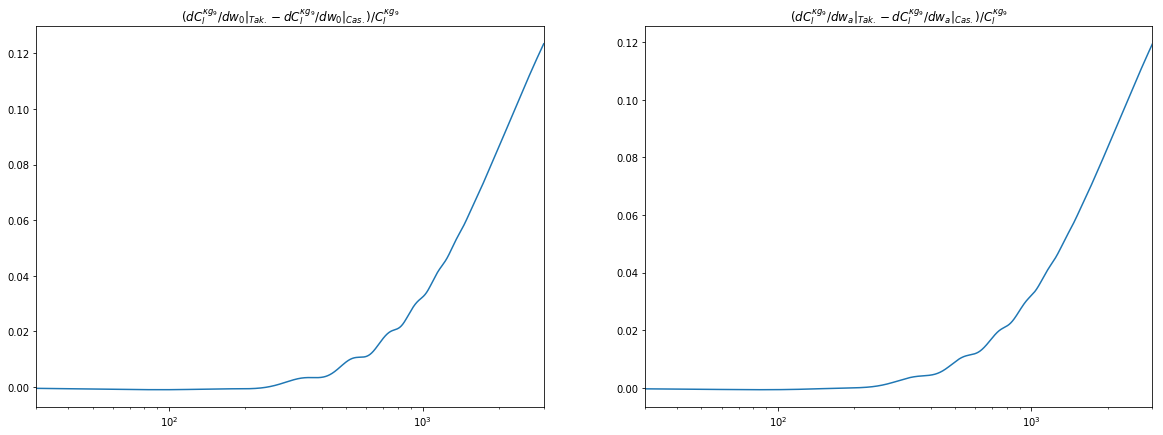

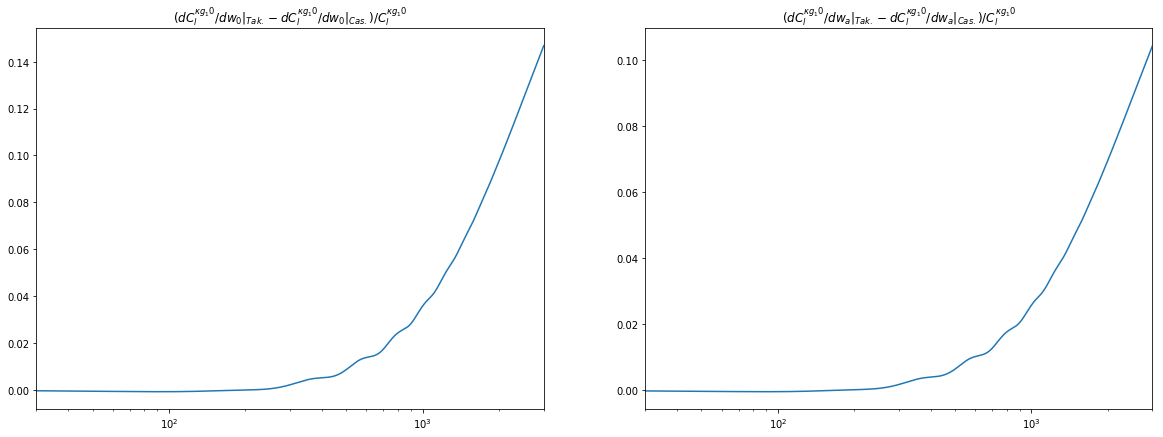

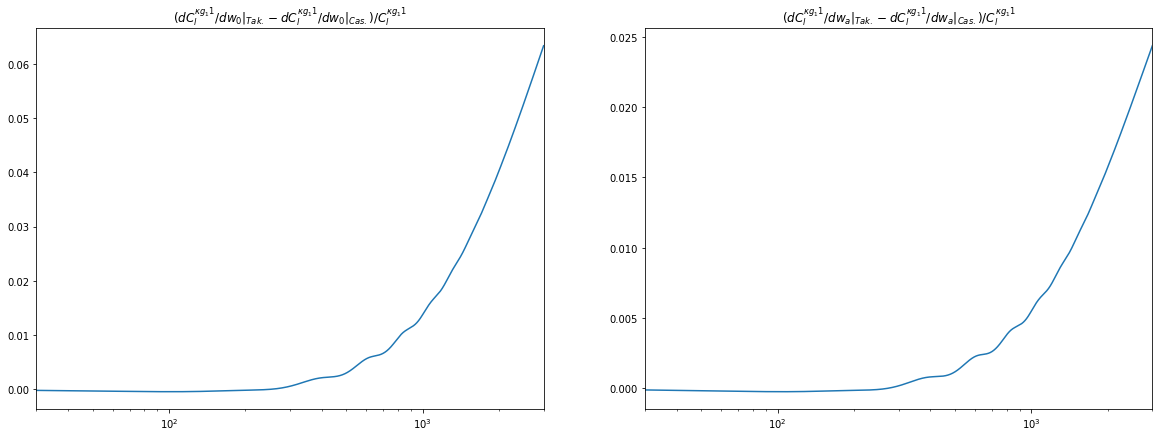

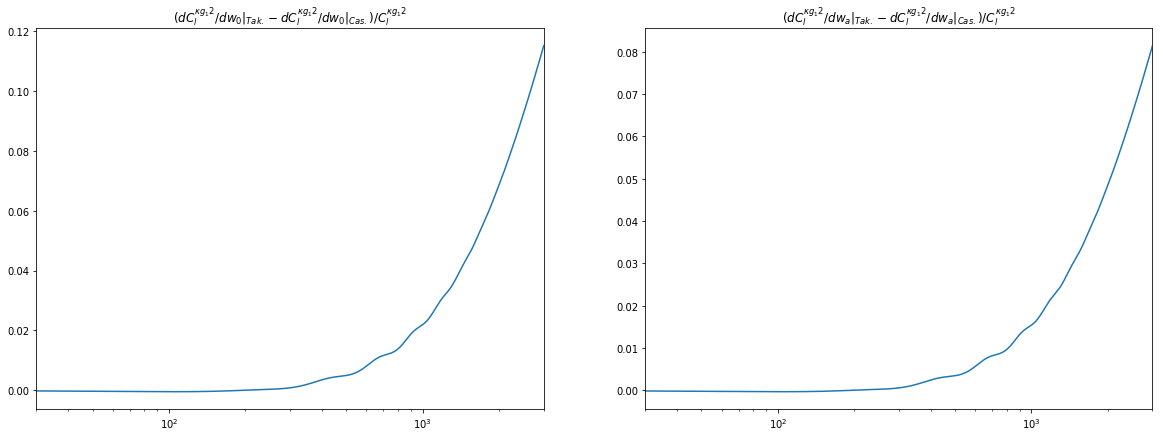

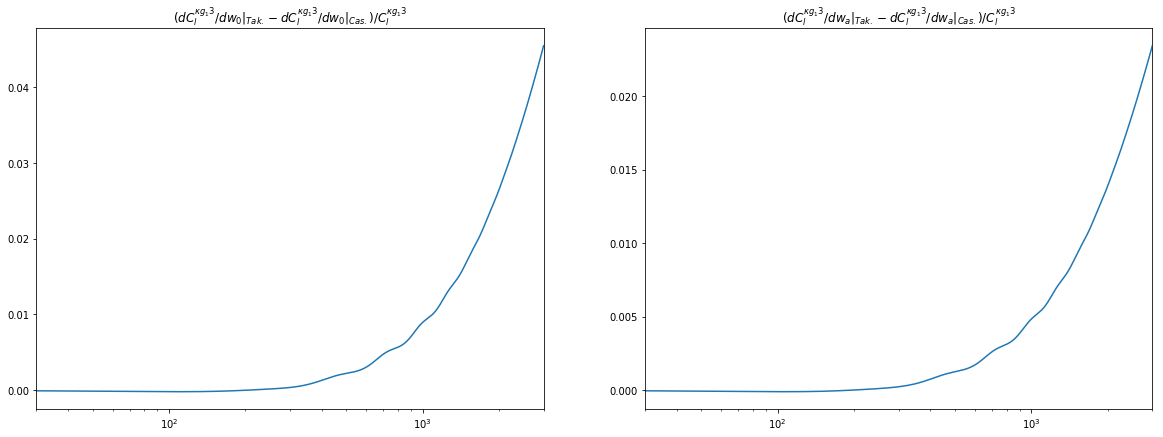

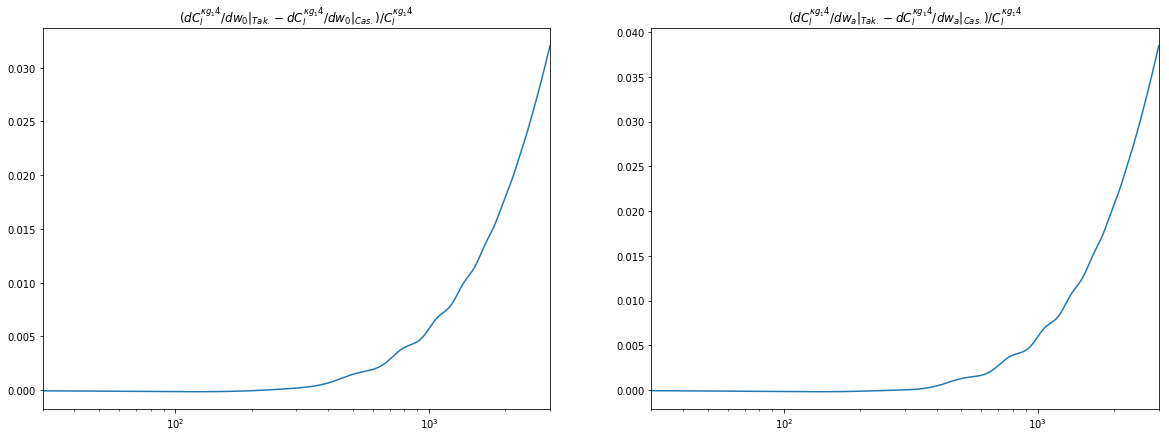

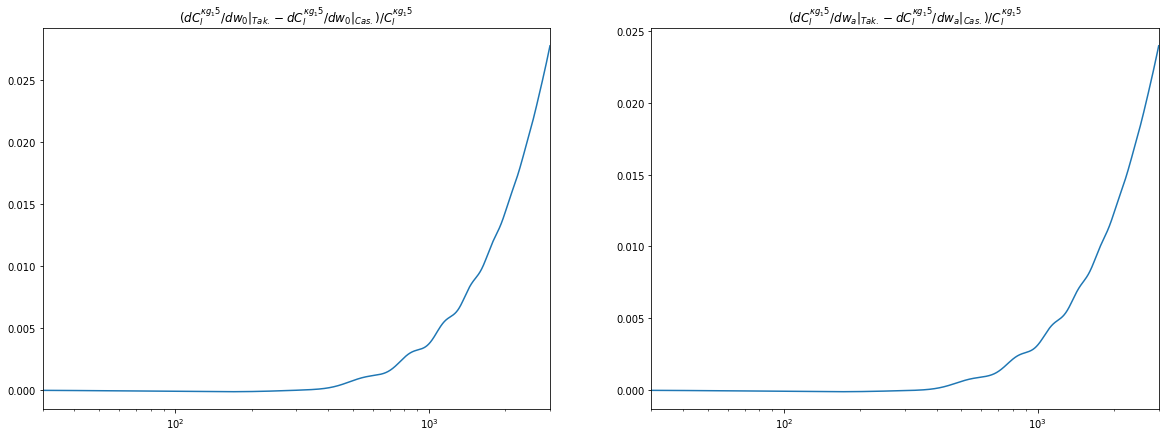

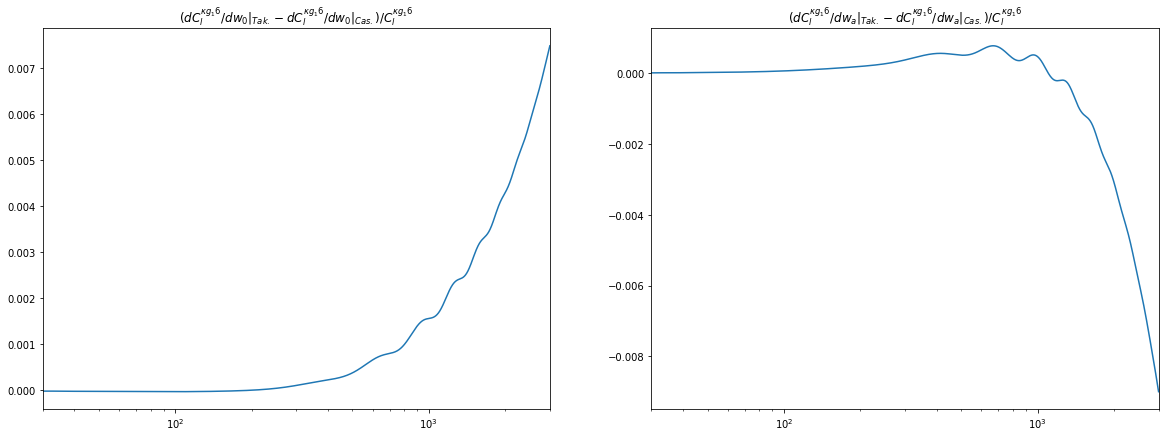

In [29]:
# try a difference of derivatives divided by a Cl
# now plot as ratio
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    toPlot = (Fobj2.dClVecs[specNum,w0Num]-Fobj4.dClVecs[specNum,w0Num])/Fobj4.crossCls[0,specNum]
    plt.semilogx(ells[28:],toPlot[28:] )
    #plt.legend()
    #plt.title(r'$(dC_l^{{\kappa g_{0} }}/dw_0|_{{w=-1}} - dC_l^{{\kappa g_{0} }}/dw_0|_{{w=-0.95}}) / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.title(r'$(dC_l^{{\kappa g_{0} }}/dw_0|_{{Tak.}} - dC_l^{{\kappa g_{0} }}/dw_0|_{{Cas.}}) / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.ylim([-0.02,0.02])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    toPlot = (Fobj2.dClVecs[specNum,waNum]-Fobj4.dClVecs[specNum,waNum])/Fobj4.crossCls[0,specNum]
    plt.semilogx(ells[28:],toPlot[28:] )
    #plt.legend()
    plt.title(r'$(dC_l^{{\kappa g_{0} }}/dw_a|_{{w=-1}} - dC_l^{{\kappa g_{0} }}/dw_a|_{{w=-0.95}}) / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.title(r'$(dC_l^{{\kappa g_{0} }}/dw_a|_{{Tak.}} - dC_l^{{\kappa g_{0} }}/dw_a|_{{Cas.}}) / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.ylim([-0.02,0.02])
    plt.show()
    